# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

from scipy.stats import trim_mean, kurtosis, skew

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# 1. Load dataset

In [2]:
# Load the dataset
file_path = 'loan_data.csv'
data = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataset
data.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
# Mengubah credit.policy dan not.fully.paid menjaid variabel kategorik
data['credit.policy'] = data['credit.policy'].astype('object')
data['not.fully.paid'] = data['not.fully.paid'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   object 
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   object 
dtypes: float64(6), int64(5), object(3)
memory usage: 1.0+ MB


In [5]:
# Cek Missing Value
data.isnull().sum()/100

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

# 2. Summarize Data (EDA)

In [6]:
# Desciptive statistics
print("\nStatistika Deskriptif Variabel Numerik")
data.describe().transpose()


Statistika Deskriptif Variabel Numerik


count          mean           std         min  \
int.rate           9578.0      0.122640      0.026847    0.060000   
installment        9578.0    319.089413    207.071301   15.670000   
log.annual.inc     9578.0     10.932117      0.614813    7.547502   
dti                9578.0     12.606679      6.883970    0.000000   
fico               9578.0    710.846314     37.970537  612.000000   
days.with.cr.line  9578.0   4560.767197   2496.930377  178.958333   
revol.bal          9578.0  16913.963876  33756.189557    0.000000   
revol.util         9578.0     46.799236     29.014417    0.000000   
inq.last.6mths     9578.0      1.577469      2.200245    0.000000   
delinq.2yrs        9578.0      0.163708      0.546215    0.000000   
pub.rec            9578.0      0.062122      0.262126    0.000000   

                           25%          50%           75%           max  
int.rate              0.103900     0.122100      0.140700  2.164000e-01  
installment         163.770000   268.950000    432.762500  9.401400e+02  
log.annual.inc       10.558414    10.928884     11.291293  1.452835e+01  
dti                   7.212500    12.665000     17.950000  2.996000e+01  
fico                682.000000   707.000000    737.000000  8.270000e+02  
days.with.cr.line  2820.000000  4139.958333   5730.000000  1.763996e+04  
revol.bal          3187.000000  8596.000000  18249.500000  1.207359e+06  
revol.util           22.600000    46.300000     70.900000  1.190000e+02  
inq.last.6mths        0.000000     1.000000      2.000000  3.300000e+01  
delinq.2yrs           0.000000     0.000000      0.000000  1.300000e+01  
pub.rec               0.000000     0.000000      0.000000  5.000000e+00

In [7]:
num_columns = data.select_dtypes(include=['number']).columns

# Calculate mean and trimmed mean for each numeric columns
mean_vs_trimmed_mean = pd.DataFrame({'mean': data[num_columns].mean(),
                                     'trimmed_mean': data[num_columns].apply(lambda x: trim_mean(x, proportiontocut=0.1))})

# Calculate kurtosis and skewness for each numeric columns
kurtosis_skewness = pd.DataFrame({'kurtosis': data[num_columns].apply(kurtosis),
                                  'skewness': data[num_columns].apply(skew)})

print("Mean vs Trimmed Mean:")
print(mean_vs_trimmed_mean)
print('================================================================')
print("\nKurtosis and Skewness:")
print(kurtosis_skewness)

Mean vs Trimmed Mean:
                           mean  trimmed_mean
int.rate               0.122640      0.122229
installment          319.089413    295.638150
log.annual.inc        10.932117     10.931770
dti                   12.606679     12.594376
fico                 710.846314    708.595772
days.with.cr.line   4560.767197   4303.643088
revol.bal          16913.963876  10809.191153
revol.util            46.799236     46.499530
inq.last.6mths         1.577469      1.163622
delinq.2yrs            0.163708      0.021268
pub.rec                0.062122      0.000000

Kurtosis and Skewness:
                     kurtosis   skewness
int.rate            -0.224833   0.164394
installment          0.137209   0.912380
log.annual.inc       1.607538   0.028664
dti                 -0.900512   0.023937
fico                -0.422718   0.471186
days.with.cr.line    1.936223   1.155567
revol.bal          259.519049  11.159310
revol.util          -1.116511   0.059976
inq.last.6mths      26.273784   3

In [8]:
print("\nStatistika Deskriptif Variabel Kategorik")
data.describe(include=object).transpose()


Statistika Deskriptif Variabel Kategorik


count unique                 top  freq
credit.policy   9578      2                   1  7710
purpose         9578      7  debt_consolidation  3957
not.fully.paid  9578      2                   0  8045

In [9]:
#statistik deskriptif variabel numerik dengan pengelompokan berdasarkan 'not.fully.paid'
descriptive_stats = data.groupby('not.fully.paid').describe().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

descriptive_stats

not.fully.paid                       0             1
int.rate          count    8045.000000  1.533000e+03
                  mean        0.120770  1.324523e-01
                  std         0.026692  2.549535e-02
                  min         0.060000  7.050000e-02
                  25%         0.099600  1.154000e-01
                  50%         0.121800  1.316000e-01
                  75%         0.138700  1.482000e-01
                  max         0.212100  2.164000e-01
installment       count    8045.000000  1.533000e+03
                  mean      314.574123  3.427851e+02
                  std       203.398688  2.239485e+02
                  min        15.670000  1.591000e+01
                  25%       162.250000  1.686400e+02
                  50%       266.520000  2.873100e+02
                  75%       423.950000  4.913000e+02
                  max       940.140000  9.268300e+02
log.annual.inc    count    8045.000000  1.533000e+03
                  mean       10.941091  1.088502e+01
                  std         0.604045  6.667176e-01
                  min         7.547502  7.600902e+00
                  25%        10.584056  1.049127e+01
                  50%        10.933178  1.087805e+01
                  75%        11.304720  1.127663e+01
                  max        14.528354  1.345884e+01
dti               count    8045.000000  1.533000e+03
                  mean       12.494413  1.319584e+01
                  std         6.855020  7.006769e+00
                  min         0.000000  0.000000e+00
                  25%         7.120000  7.830000e+00
                  50%        12.530000  1.334000e+01
                  75%        17.800000  1.883000e+01
                  max        29.950000  2.996000e+01
fico              count    8045.000000  1.533000e+03
                  mean      713.326911  6.978284e+02
                  std        38.223723  3.375681e+01
                  min       612.000000  6.170000e+02
                  25%       682.000000  6.720000e+02
                  50%       707.000000  6.920000e+02
                  75%       742.000000  7.170000e+02
                  max       827.000000  8.220000e+02
days.with.cr.line count    8045.000000  1.533000e+03
                  mean     4592.632624  4.393541e+03
                  std      2508.035500  2.431785e+03
                  min       178.958333  1.800417e+02
                  25%      2820.041667  2.759958e+03
                  50%      4140.041667  4.050000e+03
                  75%      5760.000000  5.580042e+03
                  max     17639.958330  1.569200e+04
revol.bal         count    8045.000000  1.533000e+03
                  mean    16122.724425  2.106629e+04
                  std     29637.645740  4.990569e+04
                  min         0.000000  0.000000e+00
                  25%      3171.000000  3.323000e+03
                  50%      8535.000000  8.850000e+03
                  75%     17905.000000  2.061600e+04
                  max    952013.000000  1.207359e+06
revol.util        count    8045.000000  1.533000e+03
                  mean       45.759608  5.225508e+01
                  std        28.891285  2.905791e+01
                  min         0.000000  0.000000e+00
                  25%        21.400000  2.990000e+01
                  50%        44.800000  5.390000e+01
                  75%        69.800000  7.700000e+01
                  max       119.000000  1.065000e+02
inq.last.6mths    count    8045.000000  1.533000e+03
                  mean        1.433934  2.330724e+00
                  std         1.999009  2.933480e+00
                  min         0.000000  0.000000e+00
                  25%         0.000000  0.000000e+00
                  50%         1.000000  1.000000e+00
                  75%         2.000000  3.000000e+00
                  max        31.000000  3.300000e+01
delinq.2yrs       count    8045.000000  1.533000e+03
                  mean        0.161591  1.748206e-01
                  std    

In [10]:
#statistik deskriptif variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
cat_columns = data.select_dtypes(include=['object']).columns
for column in cat_columns:
    print(f"\nStatistik Deskriptif untuk {column} yang dikelompokkan berdasarkan 'not.fully.paid':")
    grouped = data.groupby(['not.fully.paid', column]).size().unstack(fill_value=0)
    display(grouped)


Statistik Deskriptif untuk credit.policy yang dikelompokkan berdasarkan 'not.fully.paid':


credit.policy      0     1
not.fully.paid            
0               1349  6696
1                519  1014


Statistik Deskriptif untuk purpose yang dikelompokkan berdasarkan 'not.fully.paid':


purpose         all_other  credit_card  debt_consolidation  educational  \
not.fully.paid                                                            
0                    1944         1116                3354          274   
1                     387          146                 603           69   

purpose         home_improvement  major_purchase  small_business  
not.fully.paid                                                    
0                            522             388             447  
1                            107              49             172


Statistik Deskriptif untuk not.fully.paid yang dikelompokkan berdasarkan 'not.fully.paid':


not.fully.paid     0     1
not.fully.paid            
0               8045     0
1                  0  1533

## Data visualization

### Univariate Analysis

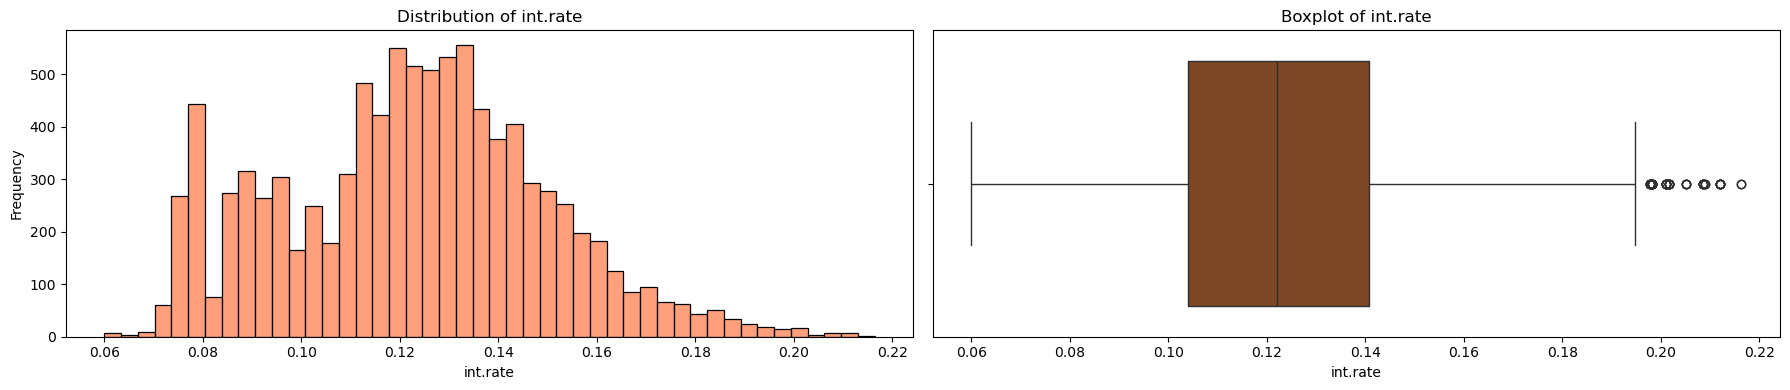

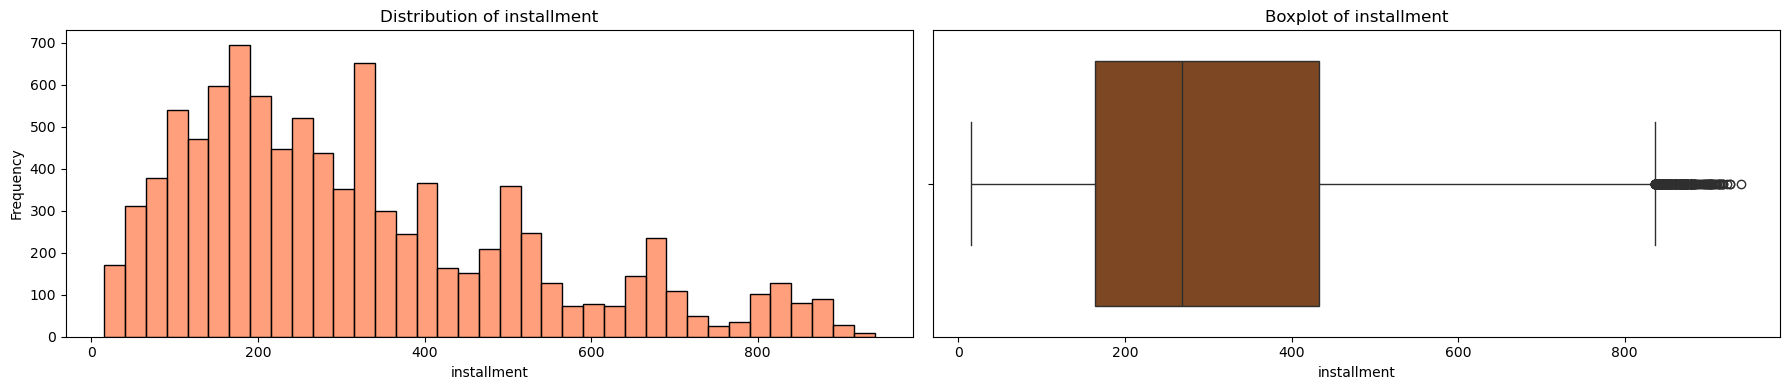

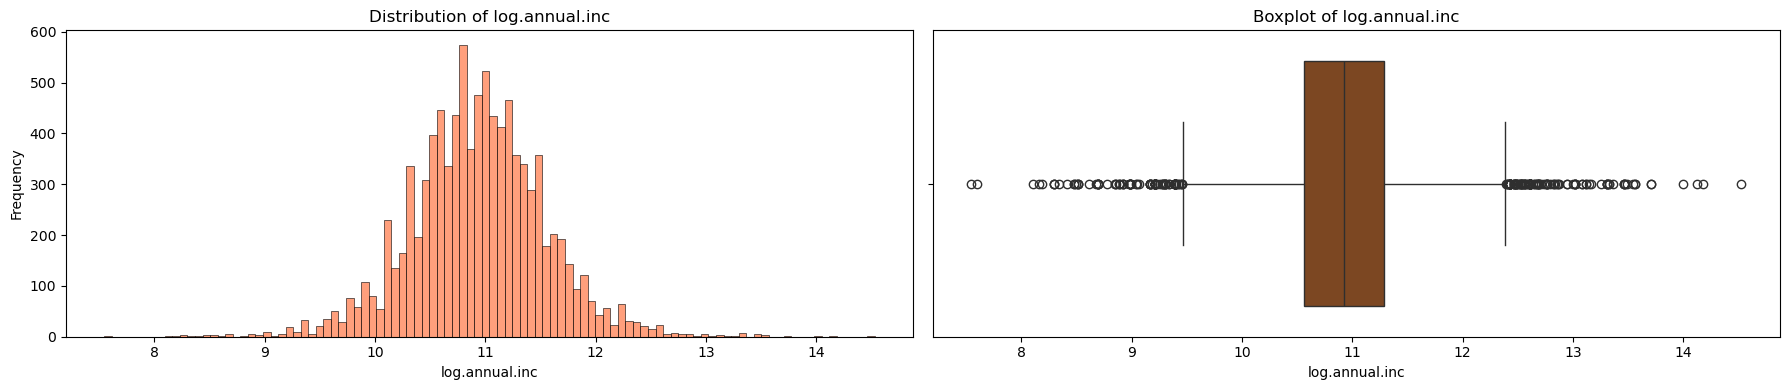

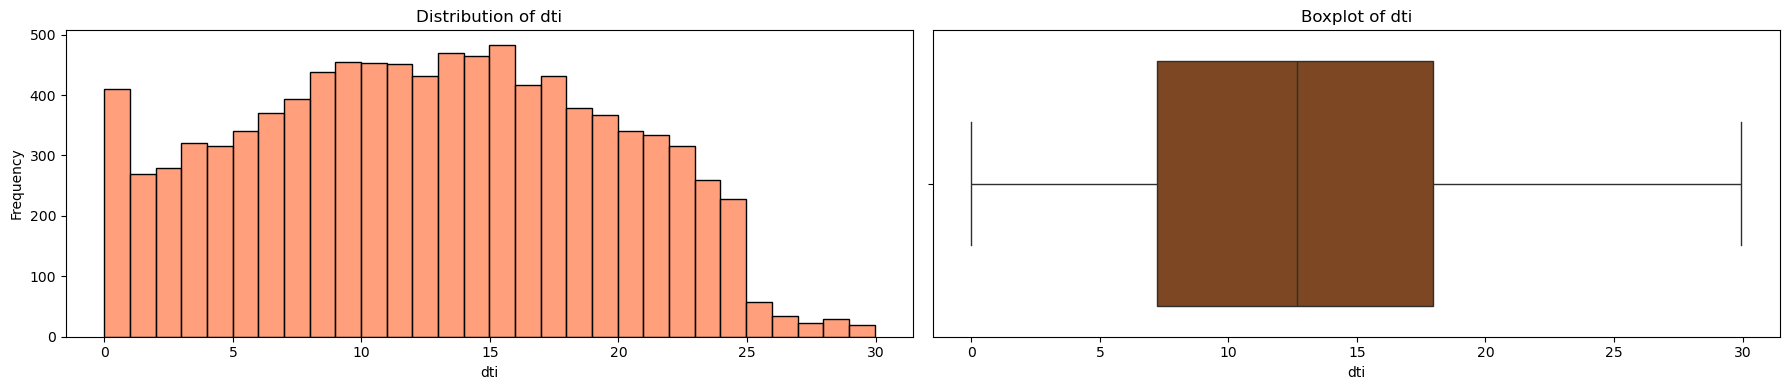

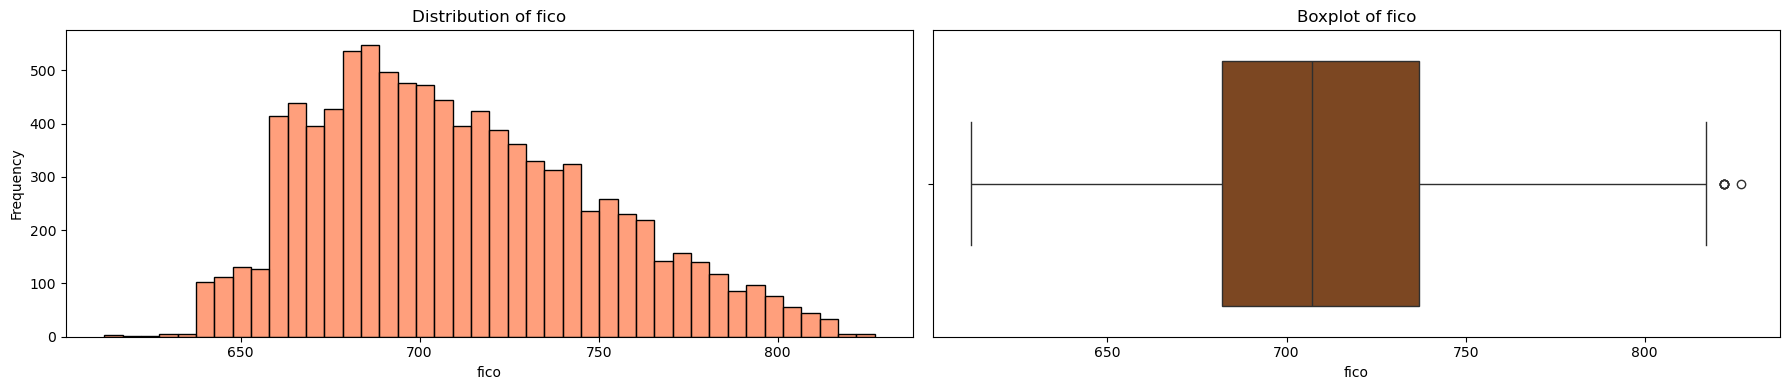

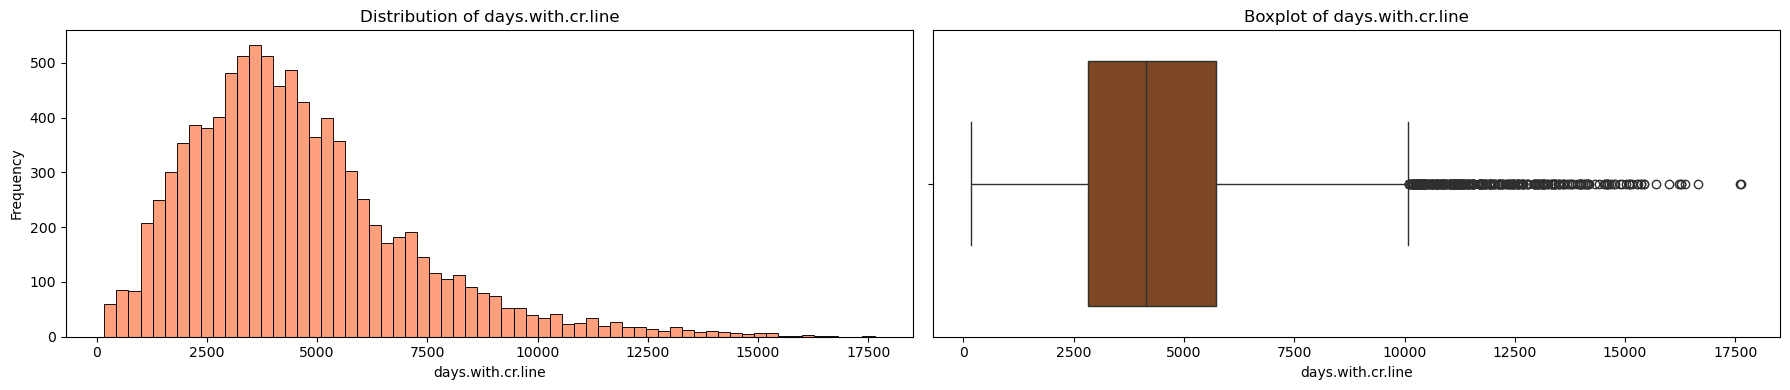

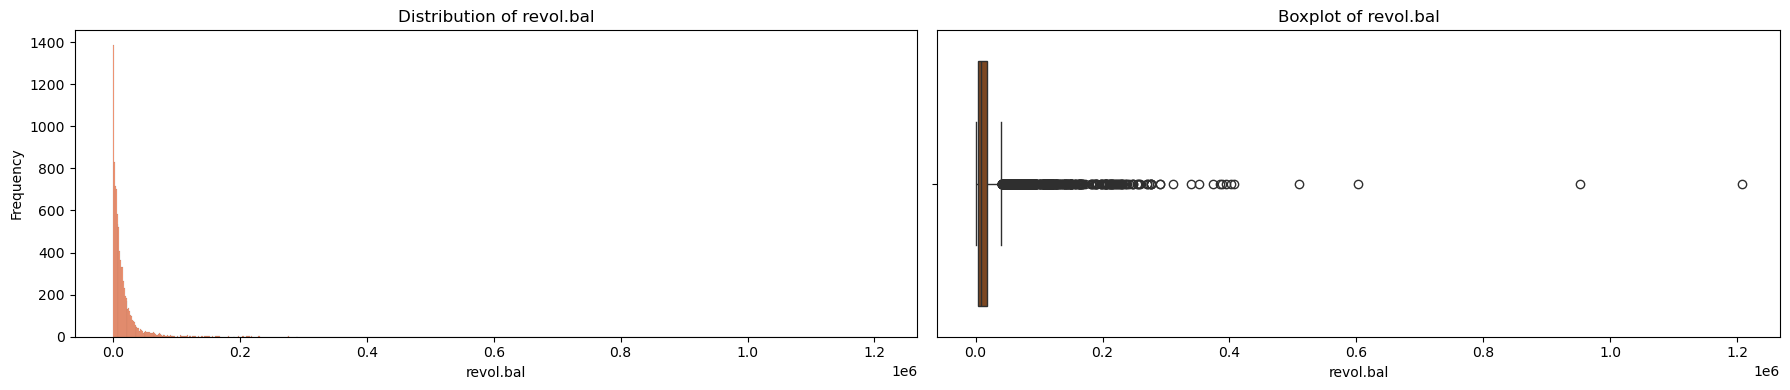

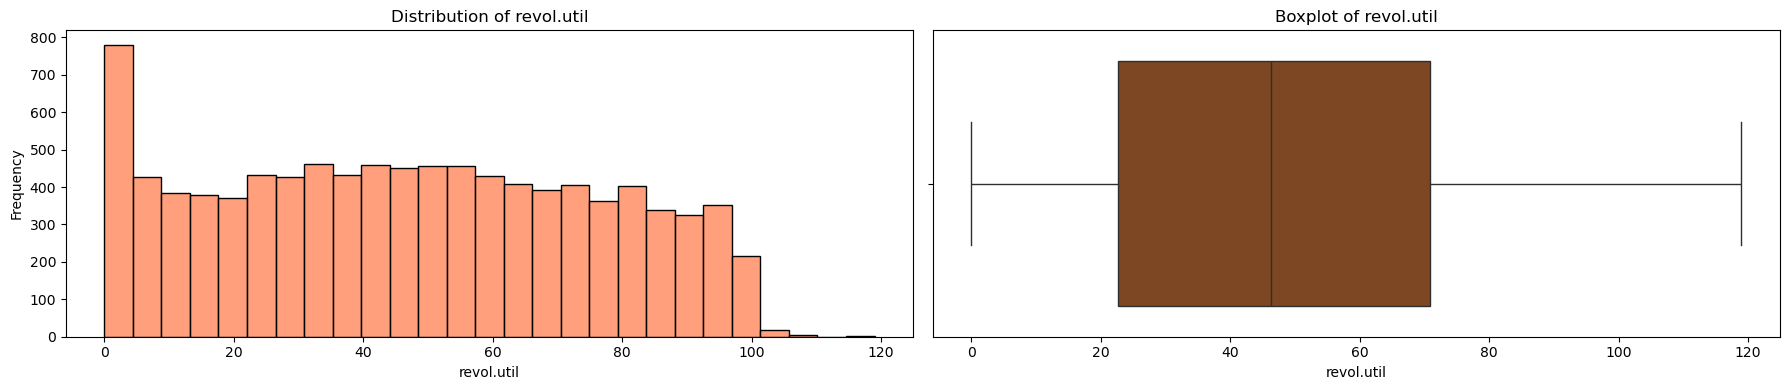

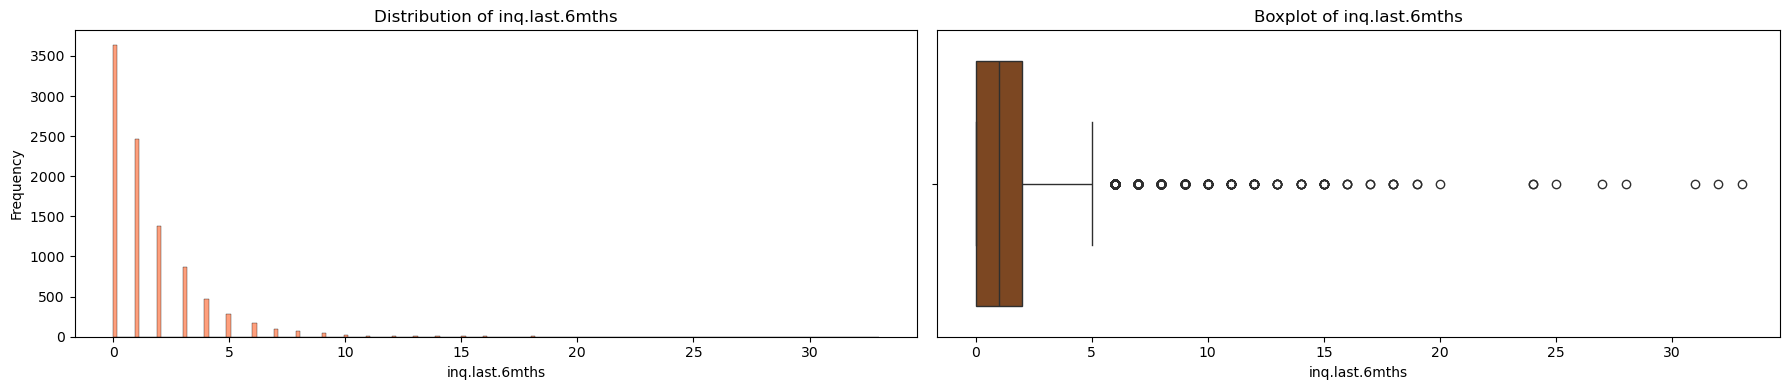

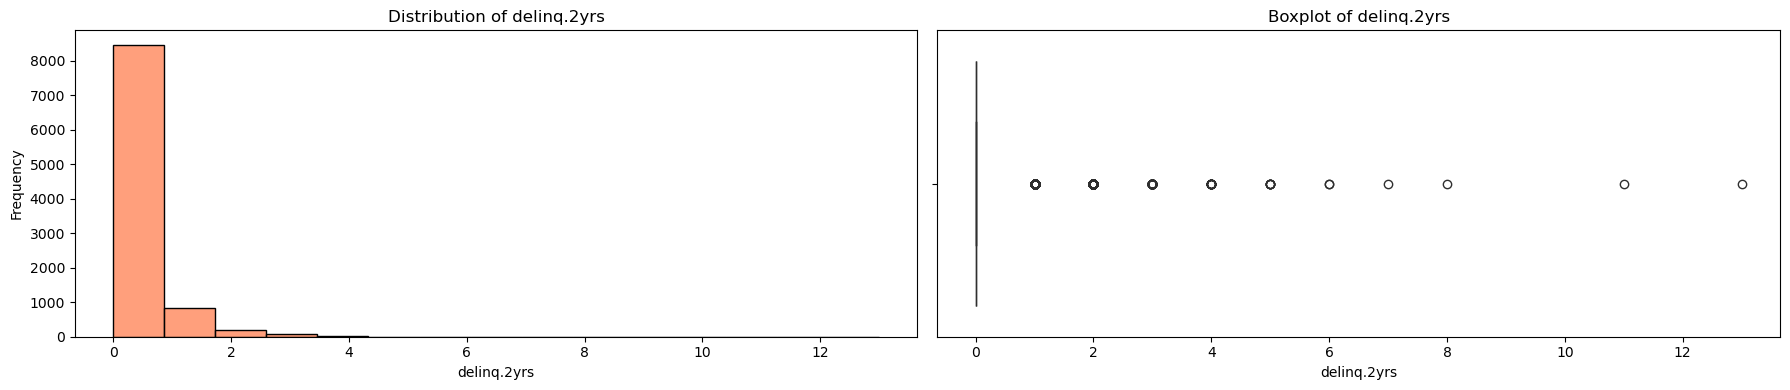

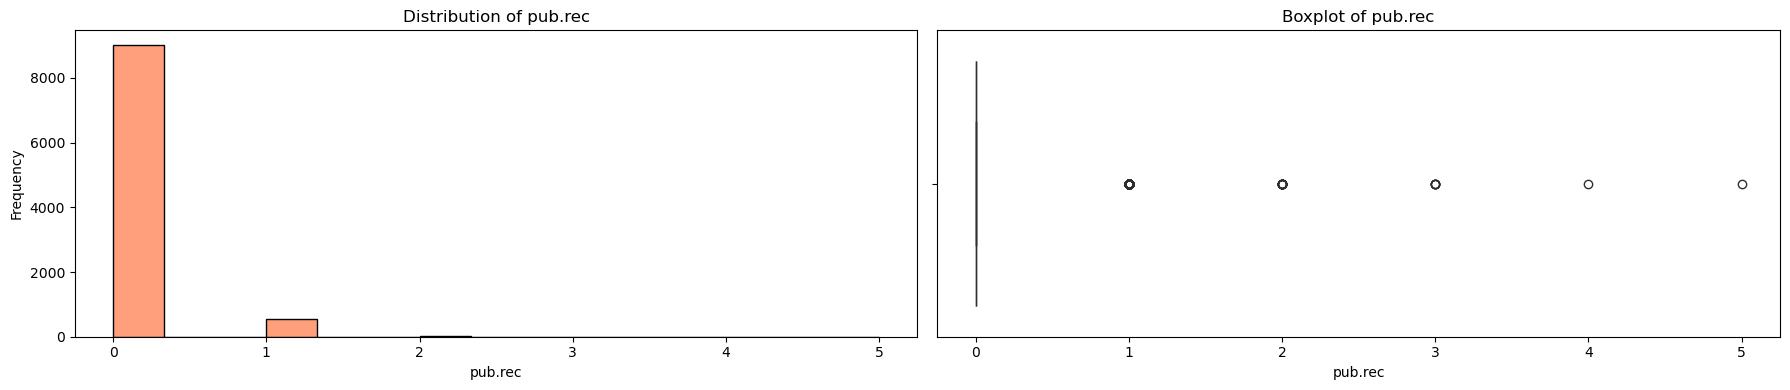

In [11]:
# Variabel Numerik
for column in num_columns :
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4))

    # Histogram 
    sns.histplot(data[column], kde=False, color='coral', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=data[column], color='saddlebrown', ax=ax2)
    ax2.set_title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()

In [12]:
# cek unique value
# Menampilkan nilai unik pada kolom delinq.2yrs
unique_delinq_2yrs = data['delinq.2yrs'].unique()
print("Unique values in delinq.2yrs:", unique_delinq_2yrs)

# Menampilkan nilai unik pada kolom pub.rec
unique_pub_rec = data['pub.rec'].unique()
print("Unique values in pub.rec:", unique_pub_rec)

# Menampilkan nilai unik pada kolom not.fully.paid
inq_last_6mths = data['inq.last.6mths'].unique()
print("inq.last.6mths:", inq_last_6mths)

Unique values in delinq.2yrs: [ 0  1  2  4  3  5  6 13  7  8 11]
Unique values in pub.rec: [0 1 2 3 4 5]
inq.last.6mths: [ 0  1  2  3  4  5  6  8  7 33  9 18 14 15 13 12 10 19 11 16 20 27 25 28
 31 24 17 32]


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1606190378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1606190378.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1606190378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1606190378.py:10: UserWarning: set_ticklabels() should onl

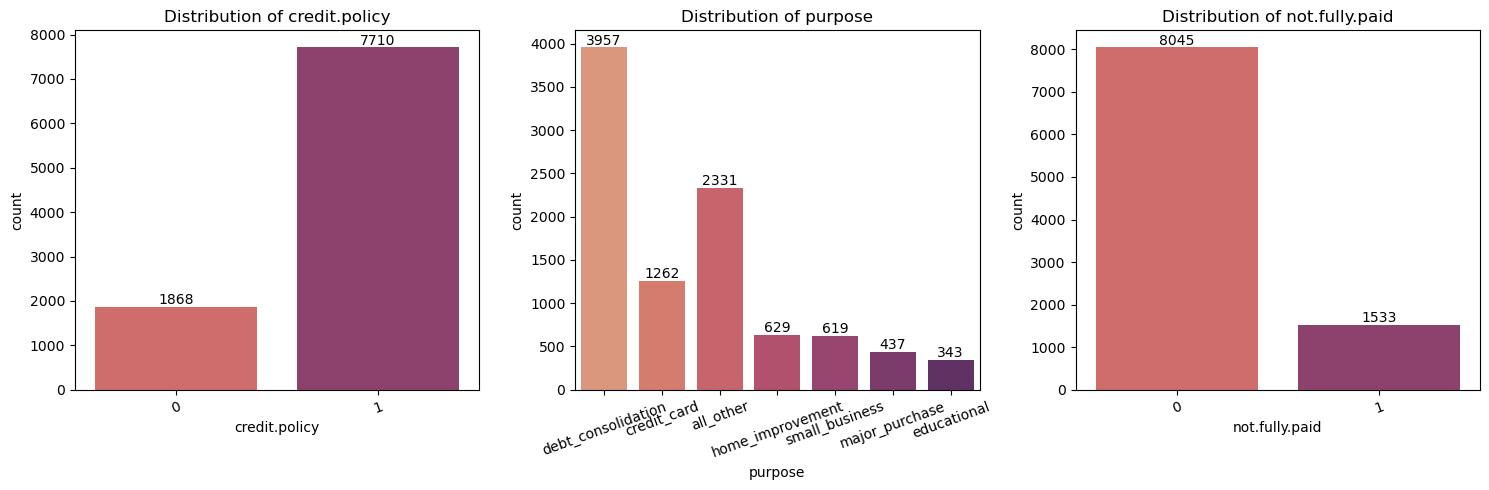

In [13]:
# Variabel Kategorik
# Bar Plot
categorical_cols = data.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i], palette='flare')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=20)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=10, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()

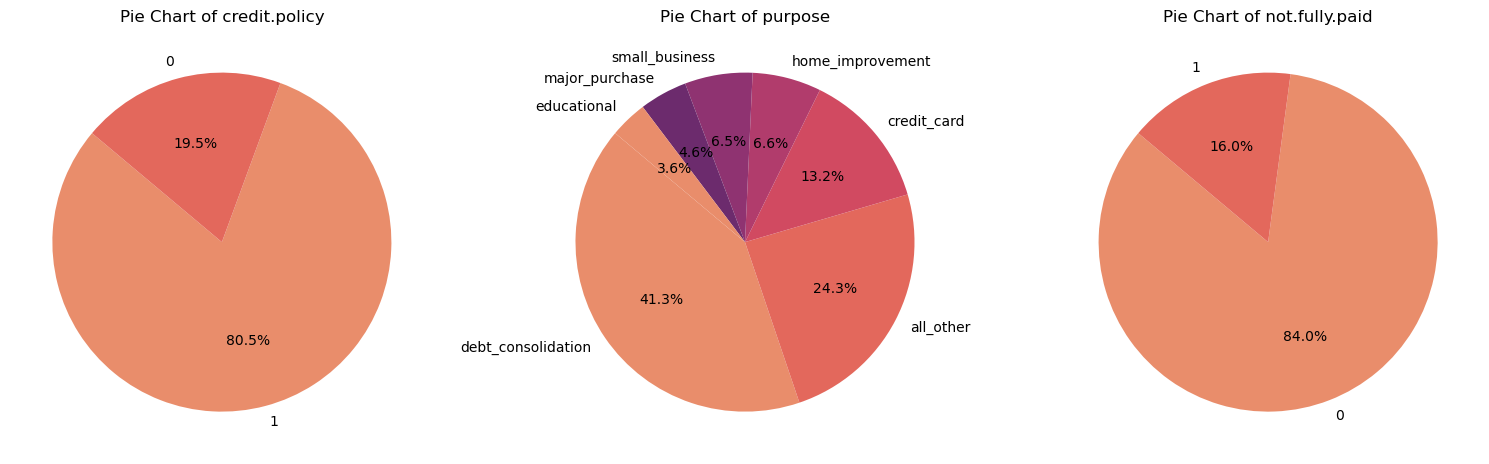

In [14]:
# Pie Chart
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(15, 5))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = data[col].value_counts()
    
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('flare'))
    axes[i].set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

### Multivariate Analysis

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


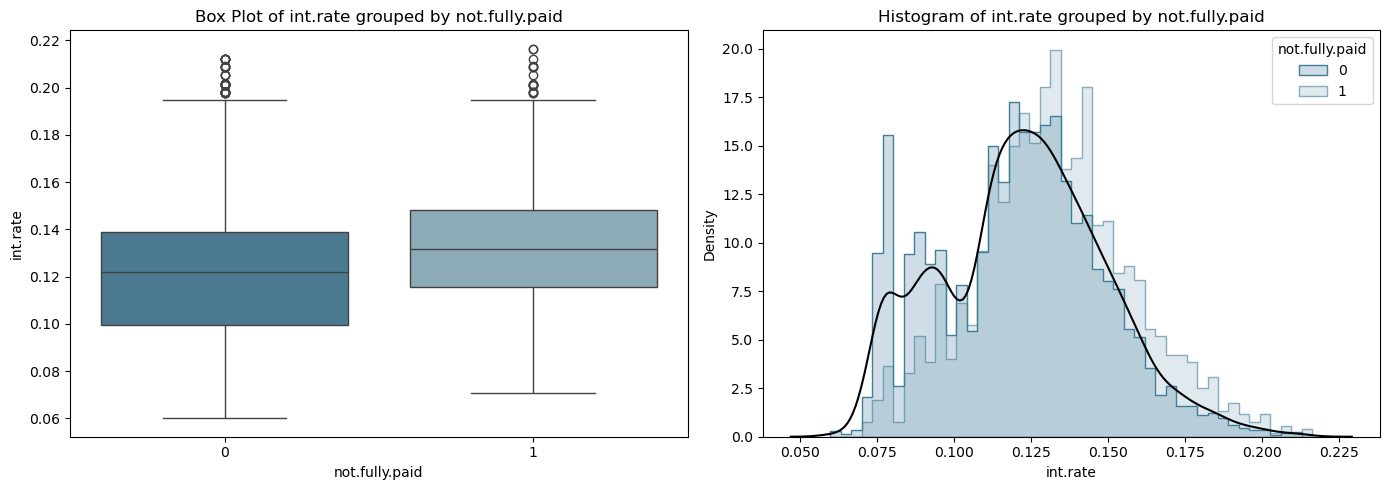

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


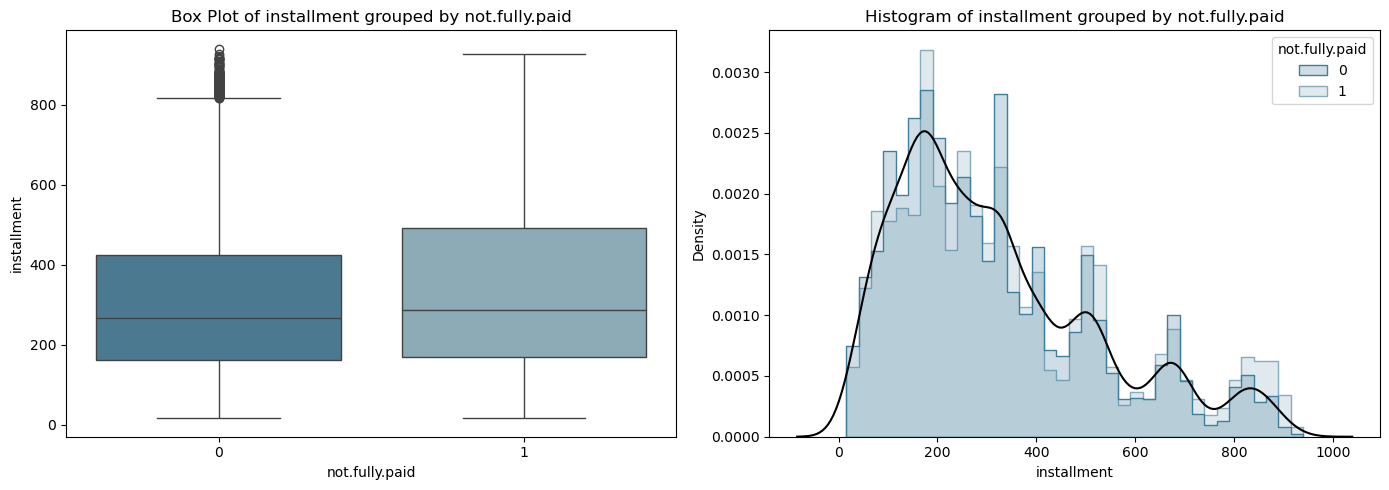

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


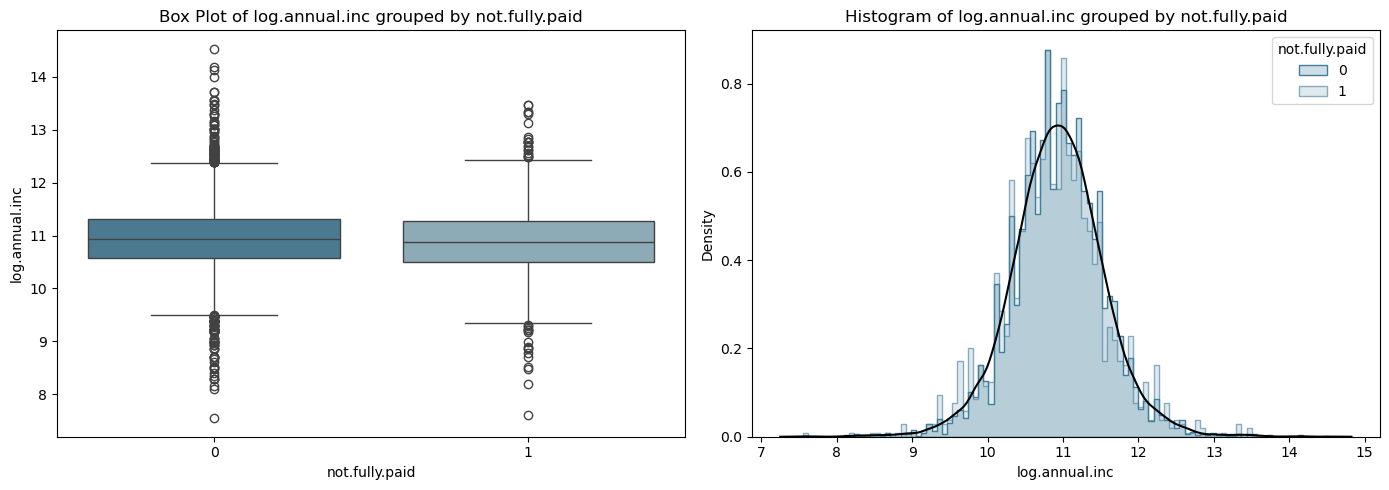

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


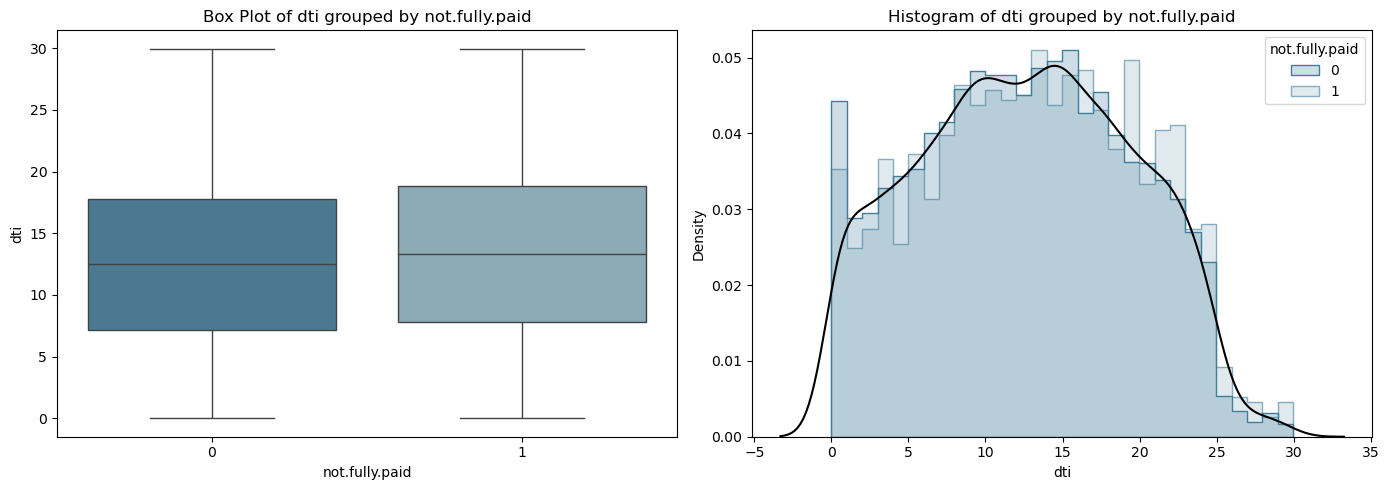

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


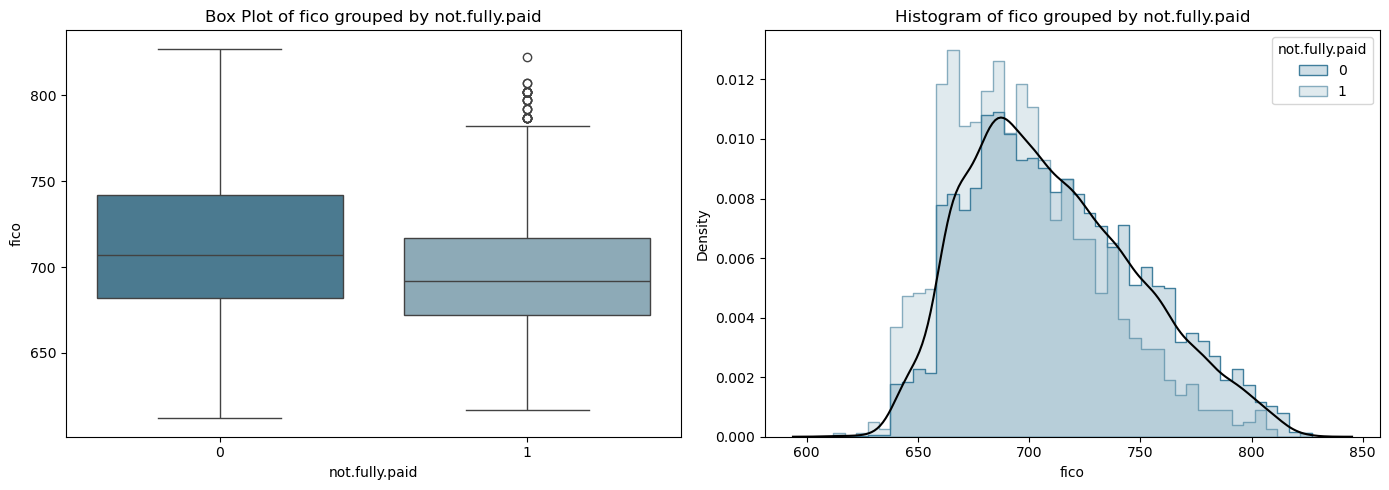

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


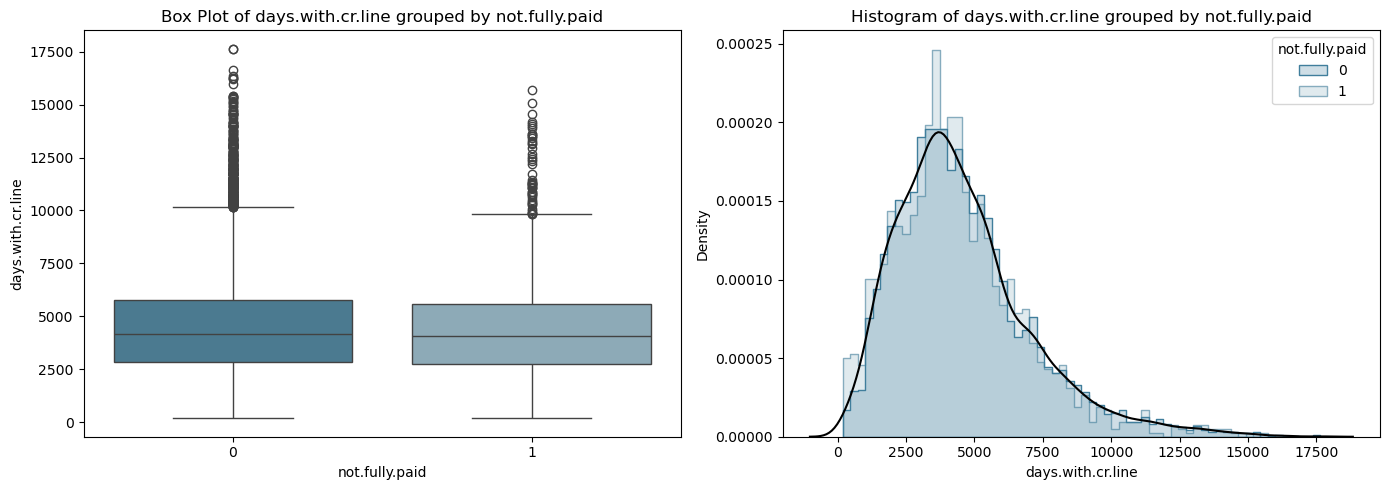

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


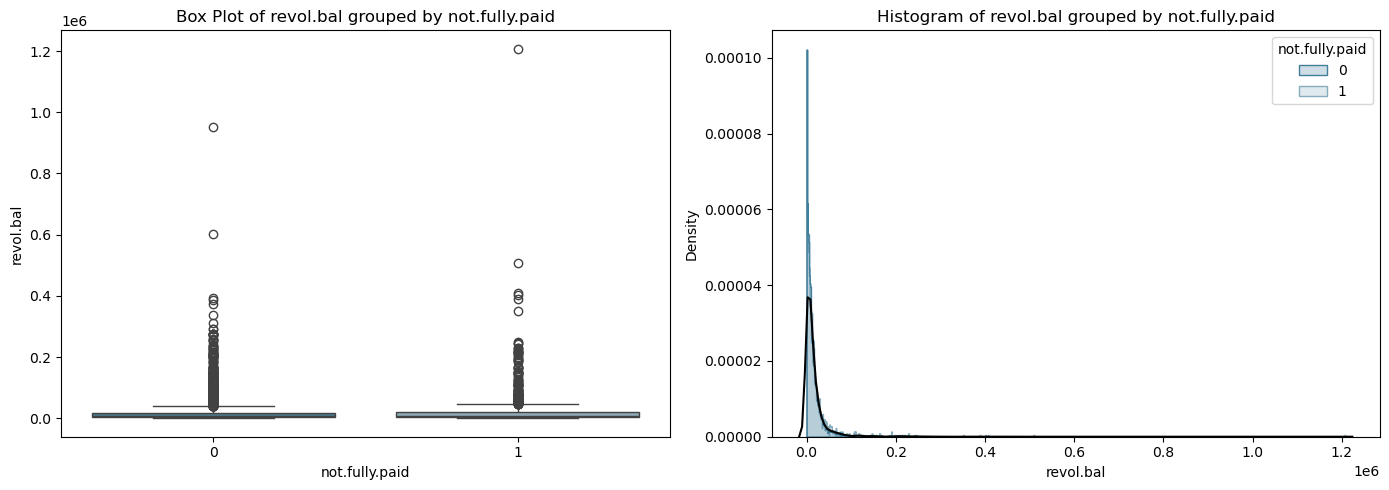

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


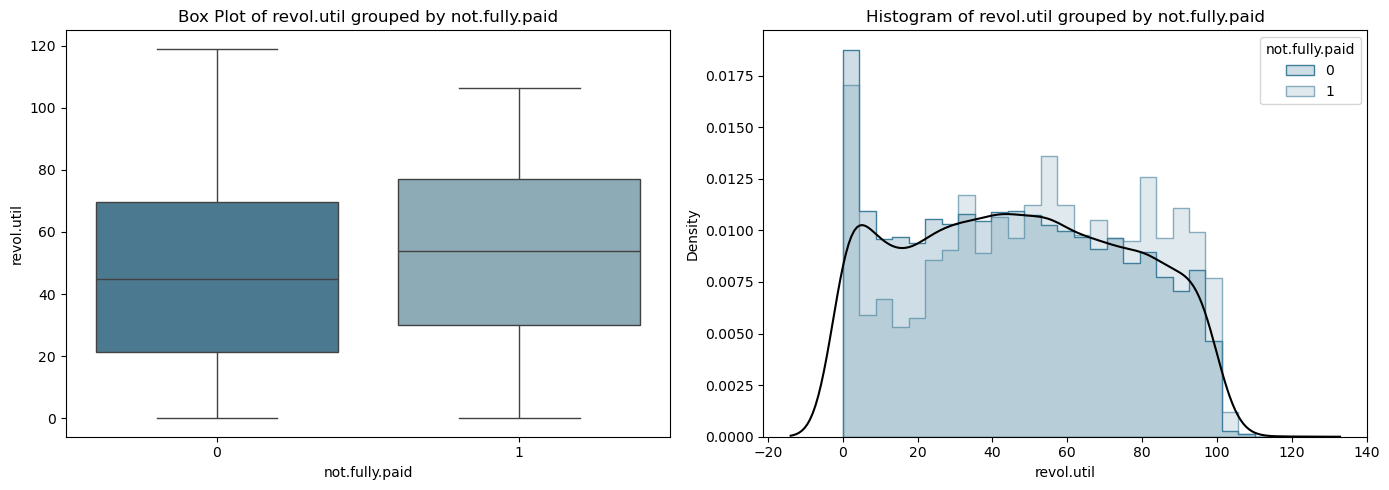

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


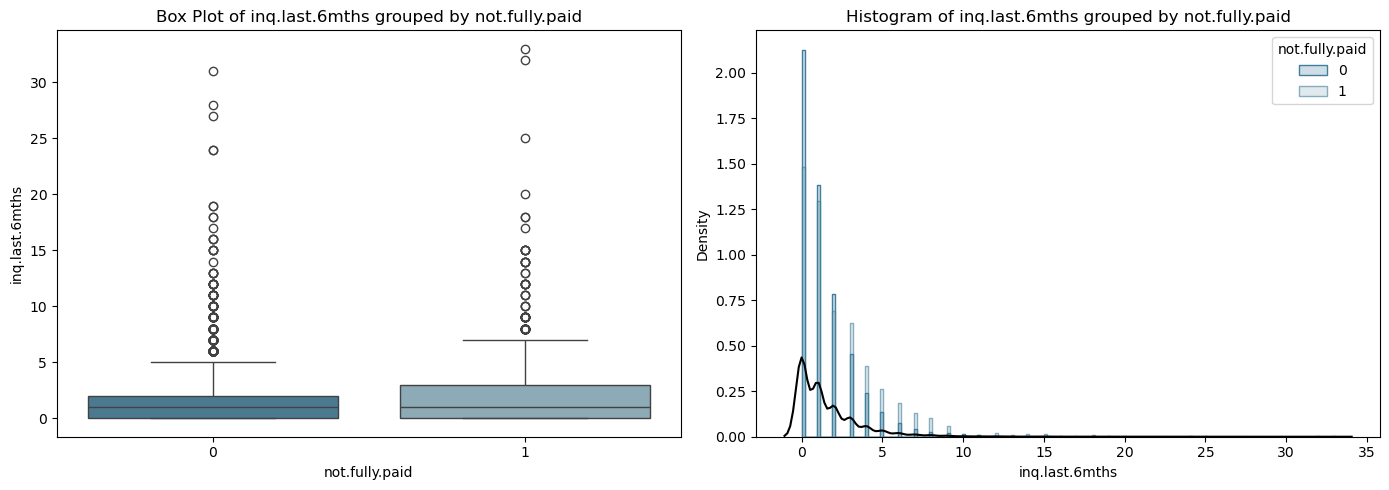

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


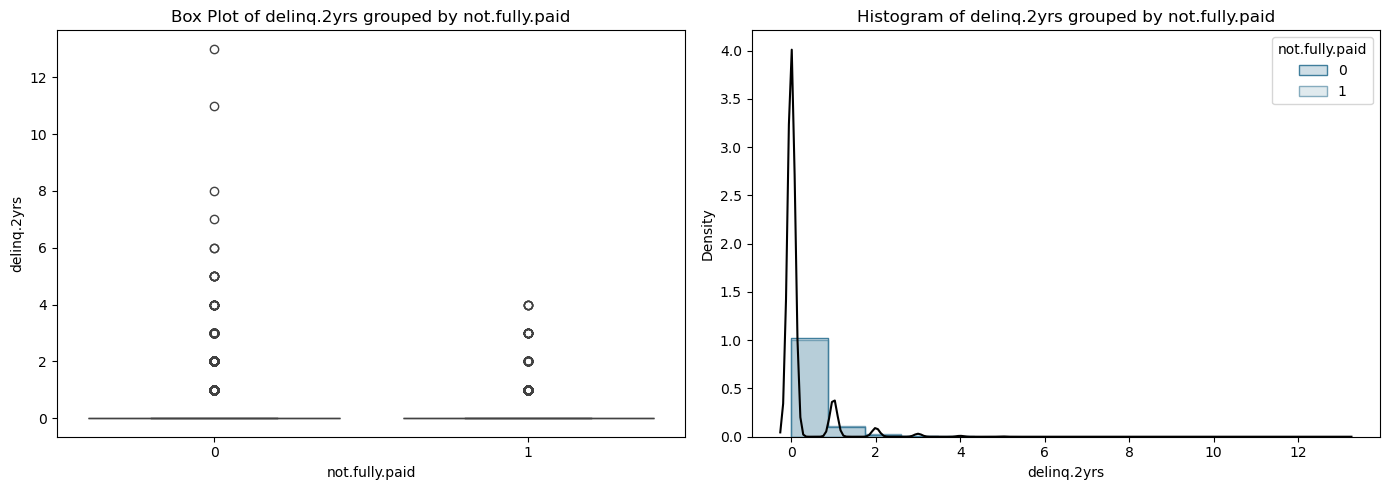

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\4136186082.py:14: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


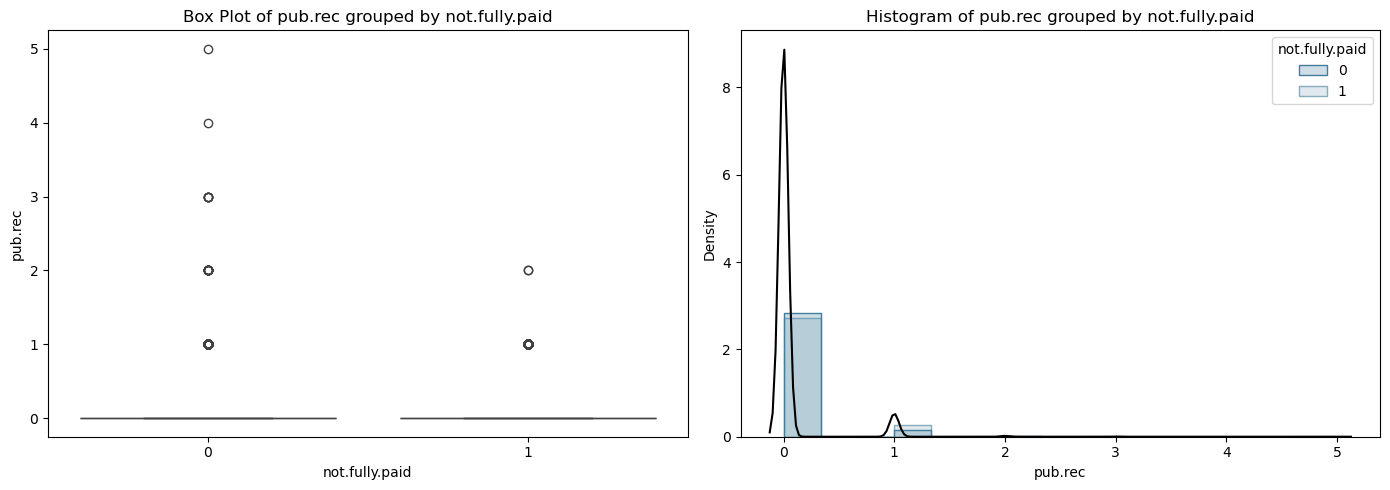

In [15]:
# Visualisasi variabel numerik dengan pengelompokan berdasarkan 'not.fully.paid'
cmap = sns.diverging_palette(230, 20, as_cmap=False)
for column in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
      # Histogram
    sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
    sns.kdeplot(data=data[column], color='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column} grouped by not.fully.paid')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    
    # Boxplot
    sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column} grouped by not.fully.paid')
    axes[0].set_xlabel('not.fully.paid')
    axes[0].set_ylabel(column)
    
    plt.tight_layout()
    plt.show()

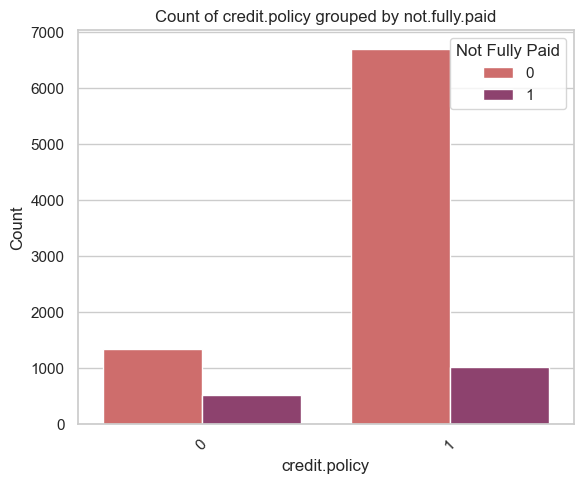

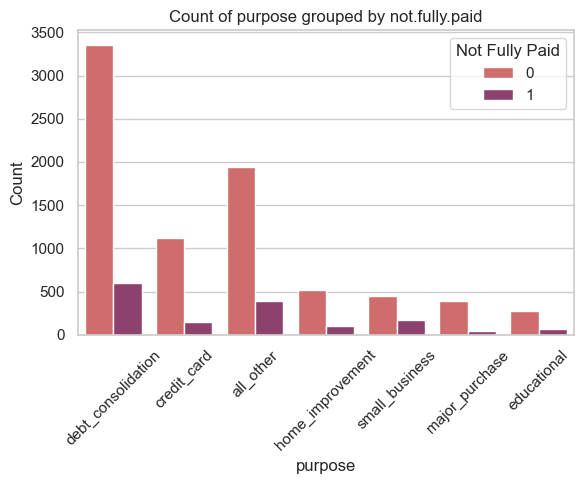

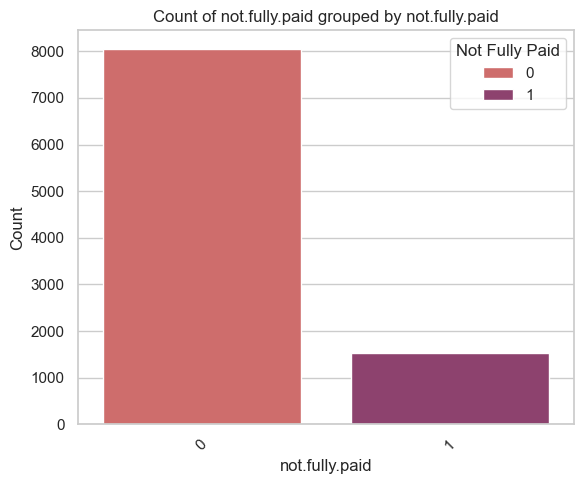

In [16]:
# Visualisasi variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
sns.set(style="whitegrid")

# Memilih kolom kategorik
cat_columns = data.select_dtypes(include=['object', 'category']).columns

# Membuat barchart untuk setiap kolom kategorik
for column in cat_columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=column, hue='not.fully.paid', data=data, palette='flare')
    plt.title(f'Count of {column} grouped by not.fully.paid')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Not Fully Paid')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


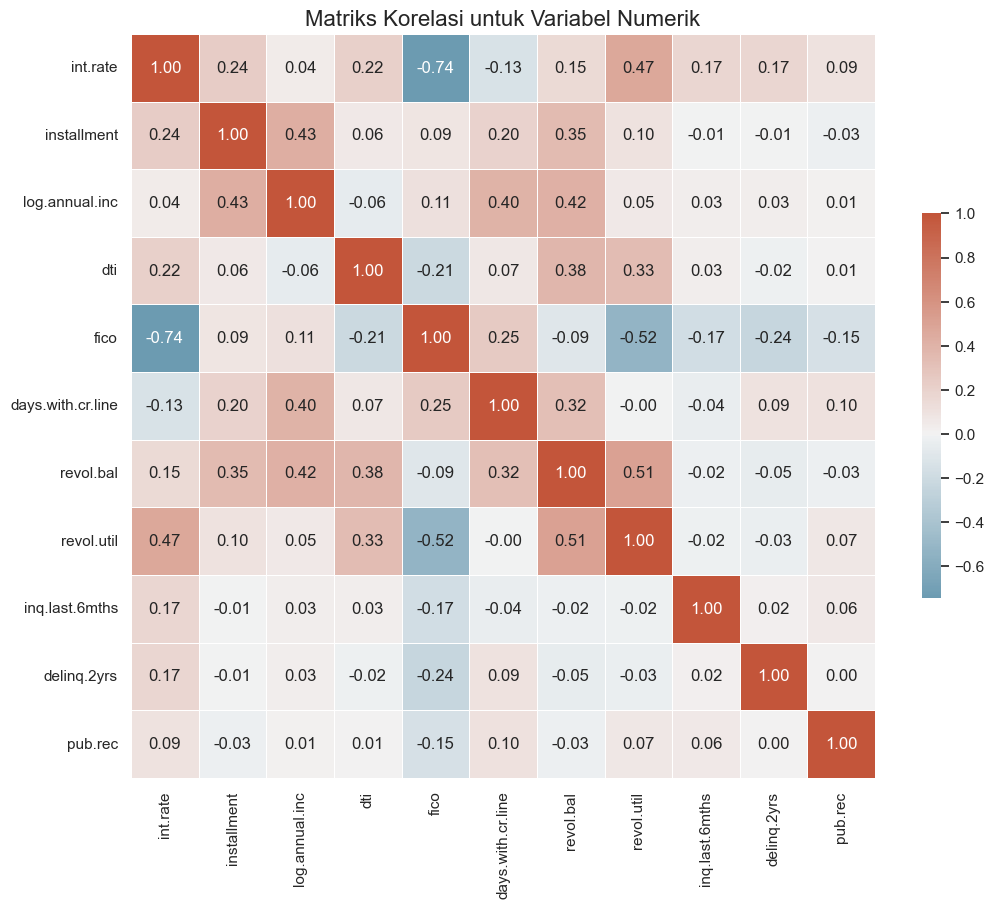

In [17]:
# Hitung matriks korelasi untuk fitur numerik 
num_columns = data.select_dtypes(include=['number']).columns
corr_matrix = data[num_columns].corr(method='spearman')

# Siapkan figure matplotlib
plt.figure(figsize=(12, 10))

# Buat colormap diverging custom
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi untuk Variabel Numerik', fontsize=16)
plt.show()


# 3. Prepare Data

## Data cleaning

### Missing Value

In [18]:
# Cek Missing Value
data.isnull().sum()/100

credit.policy        0.0
purpose              0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
not.fully.paid       0.0
dtype: float64

### Binning Data

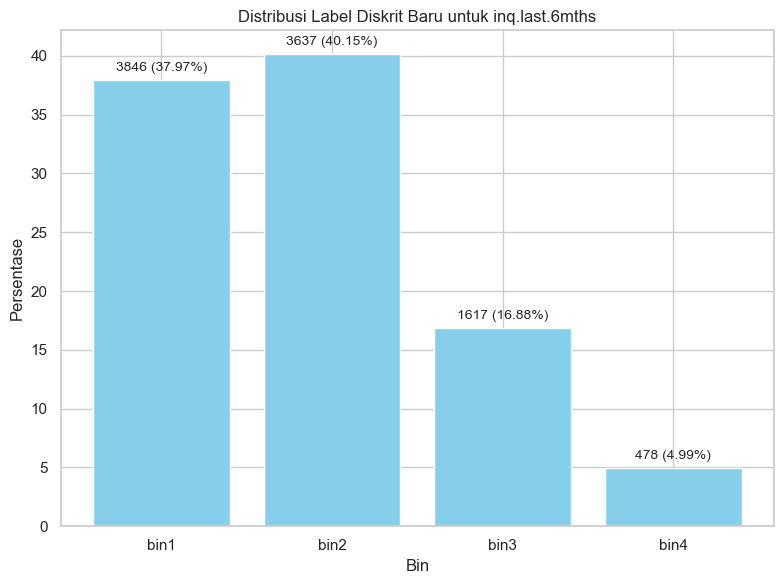

In [19]:
import matplotlib.pyplot as plt

# Definisikan fungsi binning kustom untuk fitur 'inq.last.6mths'
def custom_binning(value):
    if value == 0:
        return 'bin1'
    elif value in [1, 2]:
        return 'bin2'
    elif value in [3, 4, 5]:
        return 'bin3'
    else:
        return 'bin4'

# Terapkan fungsi binning kustom ke fitur 'inq.last.6mths'
data['inq_bin'] = data['inq.last.6mths'].apply(custom_binning)

# Hitung distribusi label diskrit baru
inq_bin_distribution = data['inq_bin'].value_counts(normalize=True) * 100

# Urutkan bin berdasarkan nama mereka
inq_bin_distribution_sorted = inq_bin_distribution.sort_index()

# Buat plot batang
plt.figure(figsize=(8, 6))
bars = plt.bar(inq_bin_distribution_sorted.index, inq_bin_distribution_sorted.values, color='skyblue')

# Tambahkan jumlah dan persentase sebagai teks di atas setiap batang
for bar, count, percentage in zip(bars, data['inq_bin'].value_counts(), inq_bin_distribution_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{count} ({percentage:.2f}%)",
             ha='center', va='bottom', fontsize=10)

# Atur judul dan label
plt.title('Distribusi Label Diskrit Baru untuk inq.last.6mths')
plt.xlabel('Bin')
plt.ylabel('Persentase')

# Tampilkan plot
plt.tight_layout()
plt.show()


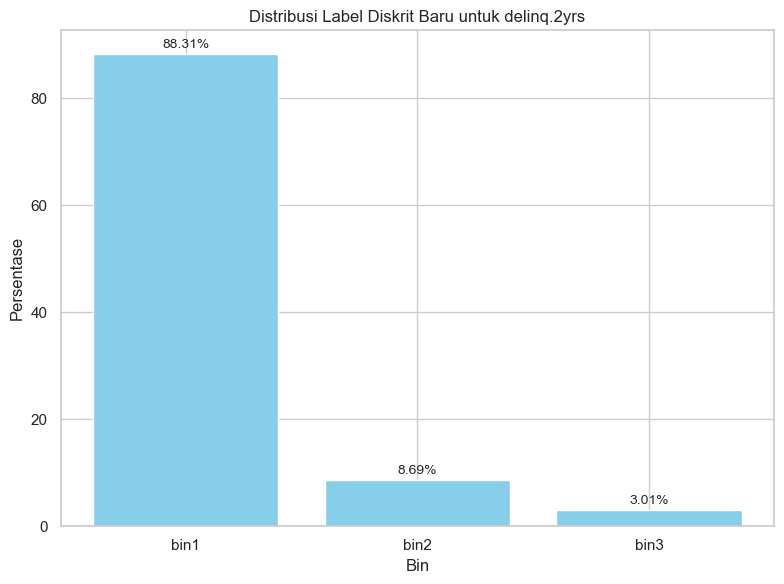

In [20]:
# Definisikan fungsi binning kustom untuk fitur 'delinq.2yrs'
def custom_binning_delinq(value):
    if value == 0:
        return 'bin1'
    elif value == 1:
        return 'bin2'
    else:
        return 'bin3'

# Terapkan fungsi binning kustom ke fitur 'delinq.2yrs'
data['delinq_bin'] = data['delinq.2yrs'].apply(custom_binning_delinq)

# Hitung distribusi label diskrit baru
delinq_bin_distribution = data['delinq_bin'].value_counts(normalize=True) * 100

# Buat plot batang
plt.figure(figsize=(8, 6))
bars = plt.bar(delinq_bin_distribution.index, delinq_bin_distribution.values, color='skyblue')

# Tambahkan persentase sebagai teks di atas setiap batang
for bar, percentage in zip(bars, delinq_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Atur judul dan label
plt.title('Distribusi Label Diskrit Baru untuk delinq.2yrs')
plt.xlabel('Bin')
plt.ylabel('Persentase')

# Tampilkan plot
plt.tight_layout()
plt.show()


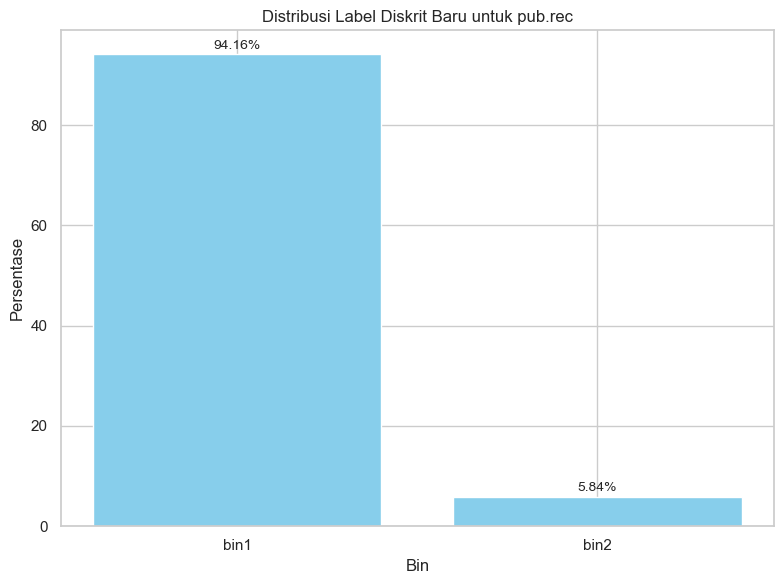

In [21]:
# Definisikan fungsi binning kustom untuk fitur 'pub.rec'
def custom_binning_pubrec(value):
    if value == 0:
        return 'bin1'
    else:
        return 'bin2'

# Terapkan fungsi binning kustom ke fitur 'pub.rec'
data['pubrec_bin'] = data['pub.rec'].apply(custom_binning_pubrec)

# Hitung distribusi label diskrit baru
pubrec_bin_distribution = data['pubrec_bin'].value_counts(normalize=True) * 100

# Buat plot batang
plt.figure(figsize=(8, 6))
bars = plt.bar(pubrec_bin_distribution.index, pubrec_bin_distribution.values, color='skyblue')

# Tambahkan persentase sebagai teks di atas setiap batang
for bar, percentage in zip(bars, pubrec_bin_distribution):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{percentage:.2f}%",
             ha='center', va='bottom', fontsize=10)

# Atur judul dan label
plt.title('Distribusi Label Diskrit Baru untuk pub.rec')
plt.xlabel('Bin')
plt.ylabel('Persentase')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   object 
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   object 
 14  inq_bin            9578 non-null   object 
 15  delinq_bin         9578 non-null   object 
 16  pubrec_bin         9578 

### Data Noise

#### Identifikasi Record dengan Nilai di Atas 100% dalam Fitur 'revol.util'

In [23]:
# Filter rekaman di mana 'revol.util' lebih dari 100%
over_100_util_records = data[data['revol.util'] > 100]

# Tambahkan nomor baris ke DataFrame setelah mereset indeks
over_100_util_records.insert(0, 'Nomor Baris', over_100_util_records.index + 1)

# Reset indeks untuk menghapus indeks default dan menghindari duplikasi
over_100_util_records.reset_index(drop=True, inplace=True)

# Definisikan fungsi untuk menerapkan warna ungu pada 'revol.util'
def highlight_revol_util(column):
    if column.name == 'revol.util':
        return ['background-color: purple'] * len(column)
    else:
        return [''] * len(column)

# Terapkan styling ke DataFrame
styled_table = over_100_util_records.style.apply(highlight_revol_util)

styled_table


In [24]:
# Filter rekaman di mana 'revol.util' lebih dari 100%
over_100_util_records_index = data.index[data['revol.util'] > 100]

# Perbarui nilai menjadi 100
data.loc[over_100_util_records_index, 'revol.util'] = 100

# Tampilkan rekaman yang telah dimodifikasi
data.loc[over_100_util_records_index]

credit.policy             purpose  int.rate  installment  log.annual.inc  \
7777             0         credit_card    0.1438        42.96        9.210340   
7895             0  debt_consolidation    0.1438       149.48        9.852194   
7914             0  debt_consolidation    0.1186        23.21       10.060491   
7922             0         credit_card    0.1438       359.95       11.245046   
7923             0           all_other    0.0933       287.59        9.615805   
7957             0  debt_consolidation    0.1786        88.41       10.915088   
7982             0         credit_card    0.1438       137.45        9.615805   
7991             0           all_other    0.0996        51.60        9.798127   
8056             0           all_other    0.1059        78.11       10.032408   
8073             0         educational    0.1375       495.52       11.338572   
8091             0  debt_consolidation    0.1691       154.90       10.373491   
8129             0  debt_consolidation    0.1583       701.47       11.156251   
8176             0  debt_consolidation    0.1425       171.50       10.463103   
8187             0         credit_card    0.1078       293.72       11.918391   
8203             0      small_business    0.1046        97.46       10.862838   
8264             0  debt_consolidation    0.1134       197.40       10.373491   
8312             0  debt_consolidation    0.1608       111.75       10.491274   
8370             0           all_other    0.1324       169.05       10.491274   
8433             0  debt_consolidation    0.1261       502.60       10.896739   
8441             0         credit_card    0.1513       138.05       10.275051   
8499             0           all_other    0.1355       169.80       10.404263   
8604             0         credit_card    0.1418       102.80       10.404263   
8605             0           all_other    0.1324       104.81       10.714418   
8655             0           all_other    0.1103        98.26       10.596635   
8684             0  debt_consolidation    0.1166       181.79        9.903688   
8702             0           all_other    0.1071        32.61        9.998798   
8733             0         credit_card    0.1222       249.90       11.097410   

        dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
7777   5.64   632         660.000000       1269       100.0               1   
7895  13.45   642        1139.000000       2422       100.0               3   
7914  11.33   657        2879.958333       4479       100.0               1   
7922   9.98   642        4679.958333      15918       100.0               6   
7923  13.36   717        3268.958333       2588       100.0               0   
7957   9.62   612        1230.000000       1190       100.0              15   
7982  16.32   647        1049.000000       4364       100.0               5   
7991  10.33   682        2910.000000       6646       100.0               1   
8056   5.70   672        3150.041667       3613       100.0               1   
8073  19.10   662        6660.041667      26710       100.0               3   
8091  27.15   652        3450.041667       2012       100.0               0   
8129  13.94   672        4050.000000      11346       100.0               6   
8176  21.50   657        4349.000000       4473       100.0               7   
8187  11.57   687        3450.041667      31629       100.0               2   
8203   4.34   682        3120.041667       8414       100.0               4   
8264  21.90   702        2760.041667       7152       100.0               0   
8312  26.03   667        2507.041667      19636       100.0              12   
8370  25.47   717        7620.041667      21991       100.0               0   
8433  19.96   682        2639.958333      11460       100.0               1   
8441  24.08   662        3990.000000       5729       100.0               0   
8499  16.62   657        1632.000000       7966       100.0               0  

#### Transformasi data revol.bal menggunakan transformasi log

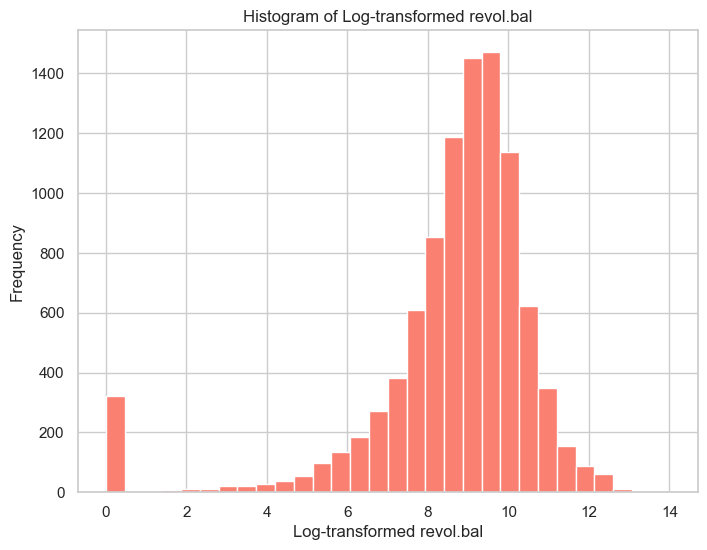

In [25]:
# Tranfprmasi Log 'revol.bal'
data['revol.bal_log'] = np.log1p(data['revol.bal'])

# Plot histogram hasil data transformasi
plt.figure(figsize=(8, 6))
data['revol.bal_log'].hist(color='salmon', bins=30)
plt.title('Histogram of Log-transformed revol.bal')
plt.xlabel('Log-transformed revol.bal')
plt.ylabel('Frequency')
plt.show()


### Drop variabel lama yang sudah diganti menjadi variabel baru

In [26]:
# Drop Variabel
features_to_drop = ['revol.bal', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
data.drop(features_to_drop, axis=1, inplace=True)
data_head_styled = data.head().style
data_head_styled

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   object 
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.util         9578 non-null   float64
 9   not.fully.paid     9578 non-null   object 
 10  inq_bin            9578 non-null   object 
 11  delinq_bin         9578 non-null   object 
 12  pubrec_bin         9578 non-null   object 
 13  revol.bal_log      9578 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.0+ MB


### Menghapus Data Outlier

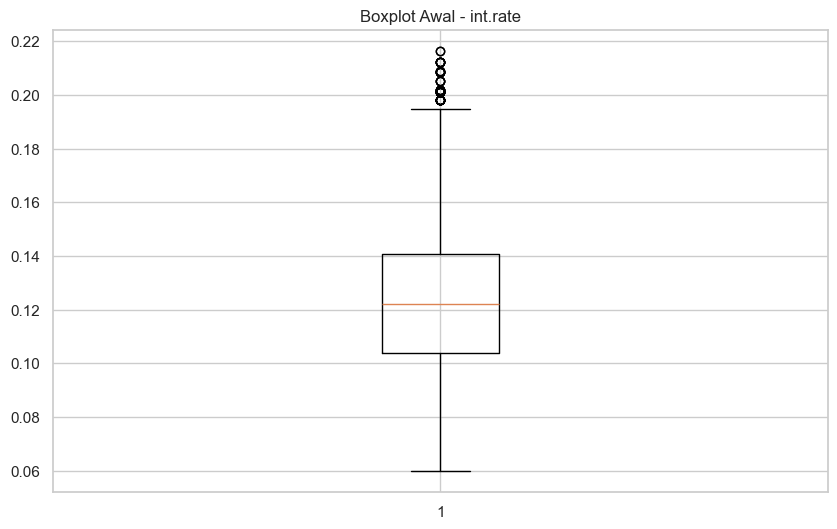

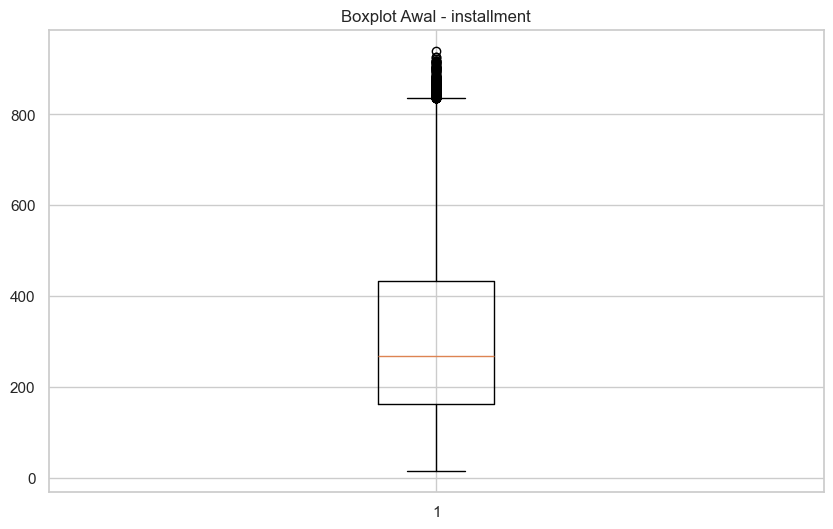

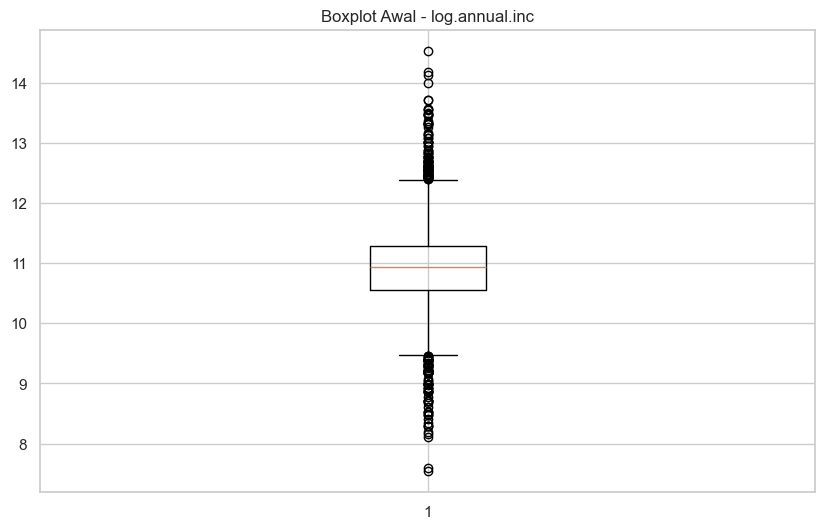

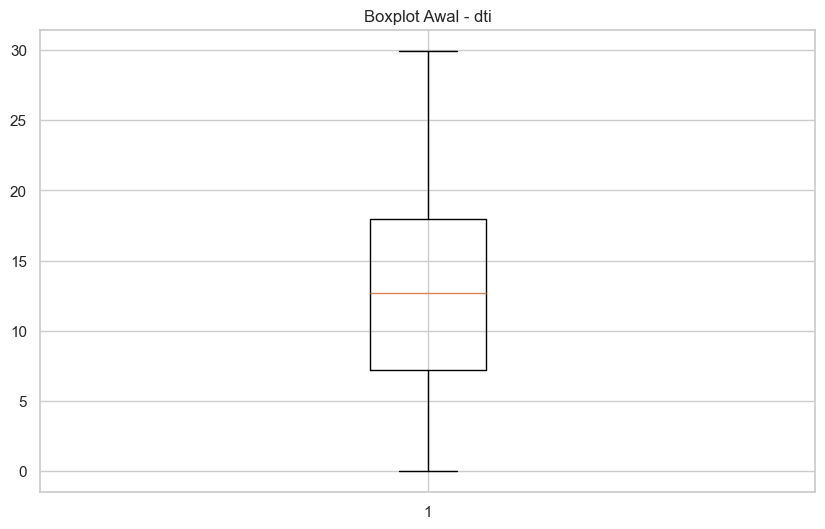

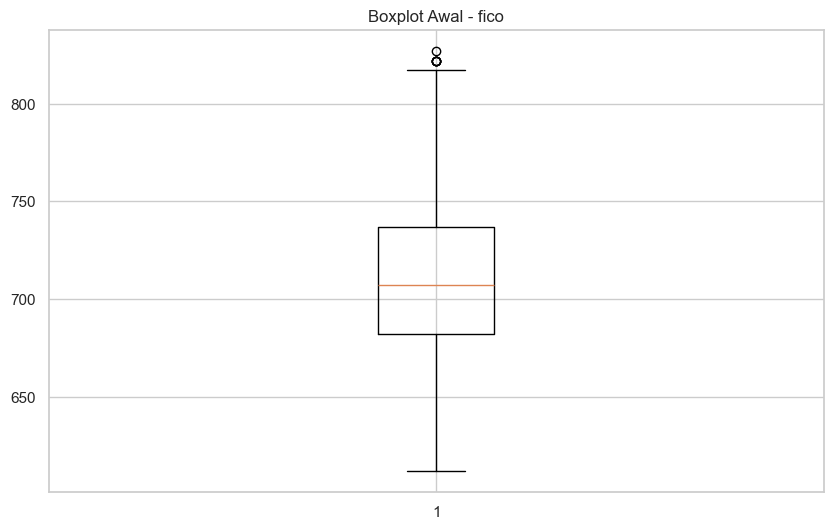

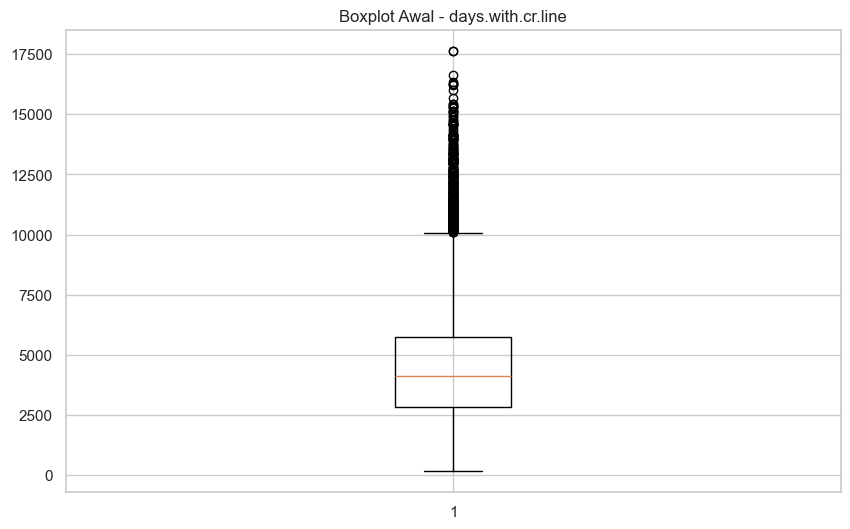

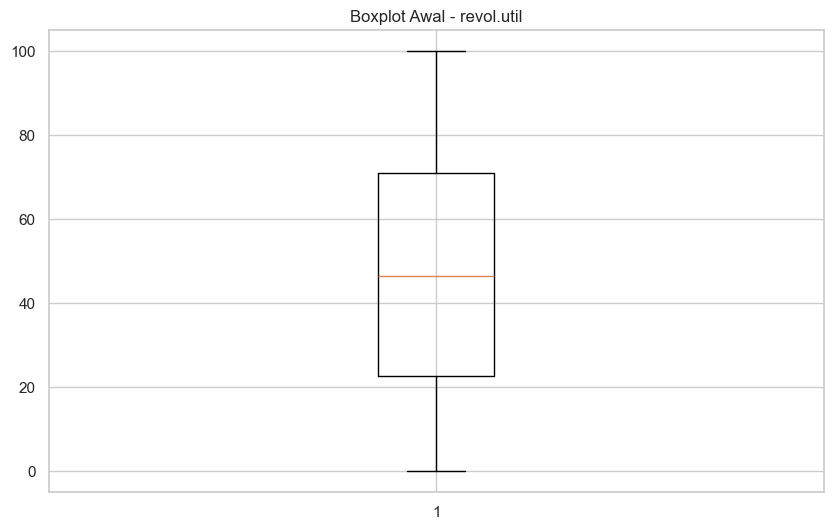

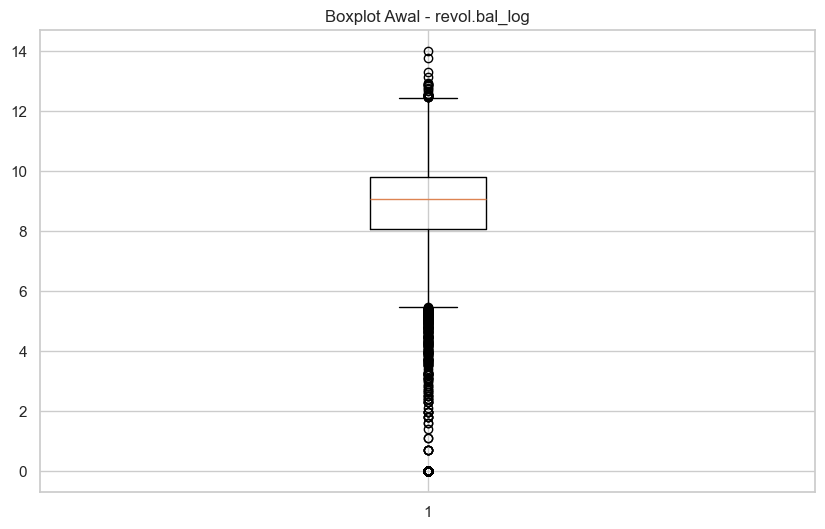

In [28]:
## Cek Boxplot
# Fungsi untuk membuat boxplot
def buat_boxplot(data, judul):
    plt.figure(figsize=(10, 6))
    plt.boxplot(data)
    plt.title(judul)
    plt.show()

    
# Mengambil kolom dengan tipe data numerik (integer dan float)
numerik_data = data.select_dtypes(include=[np.number])
    
# Plot boxplot awal untuk setiap kolom numerik
for kolom in numerik_data.columns:
    buat_boxplot(numerik_data[kolom], f'Boxplot Awal - {kolom}')

In [29]:
### hapus outlier menggunakan IQR

# Fungsi untuk menghapus outlier menggunakan IQR
def hapus_outlier_iqr(data, kolom):
    Q1 = data[kolom].quantile(0.25)
    Q3 = data[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    data_terfilter = data[(data[kolom] >= batas_bawah) & (data[kolom] <= batas_atas)]
    return data_terfilter

# Hapus outlier untuk setiap kolom numerik
numerik_data_terfilter = numerik_data.copy()
for kolom in numerik_data.columns:
    numerik_data_terfilter = hapus_outlier_iqr(numerik_data_terfilter, kolom)

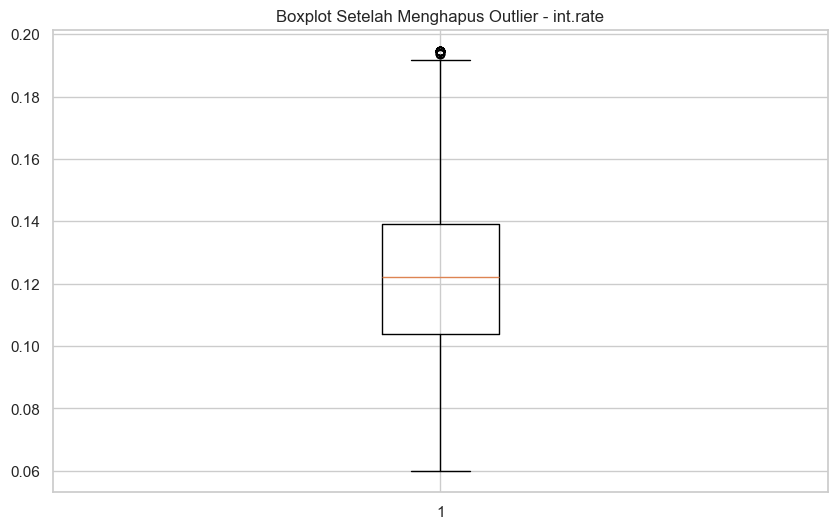

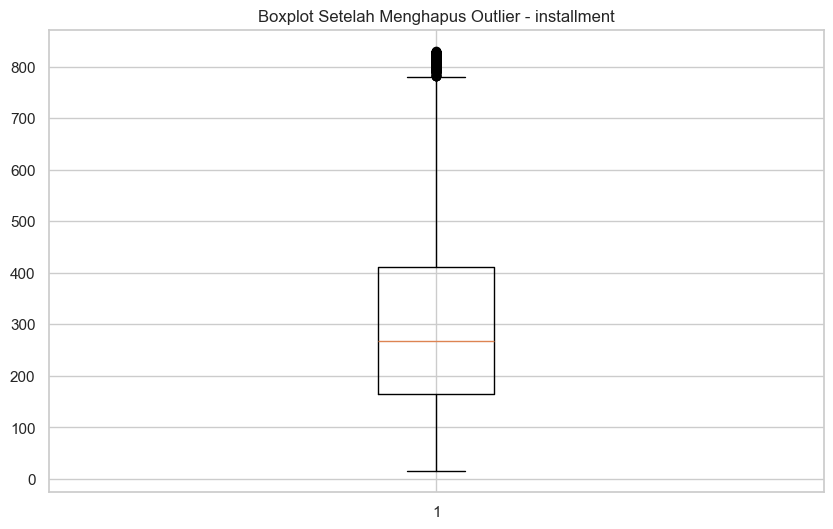

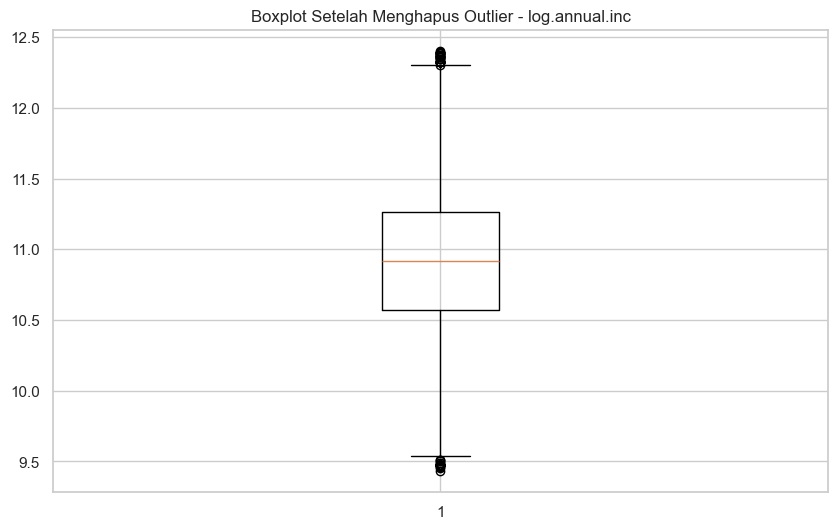

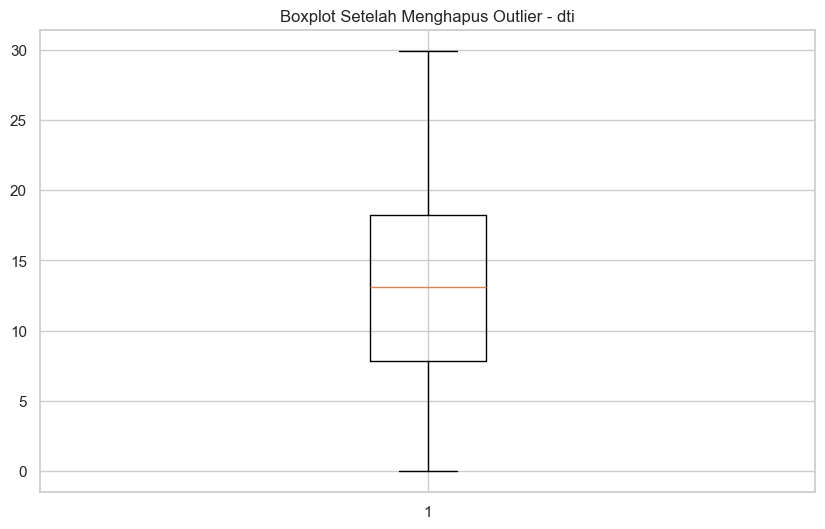

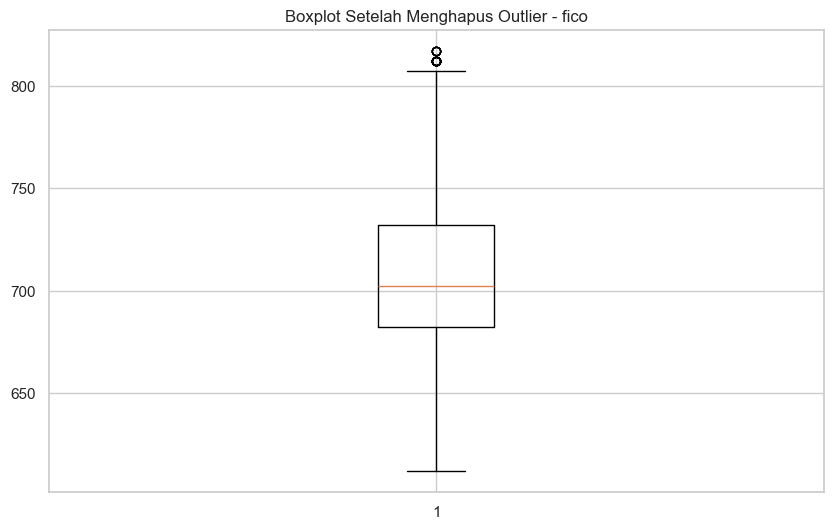

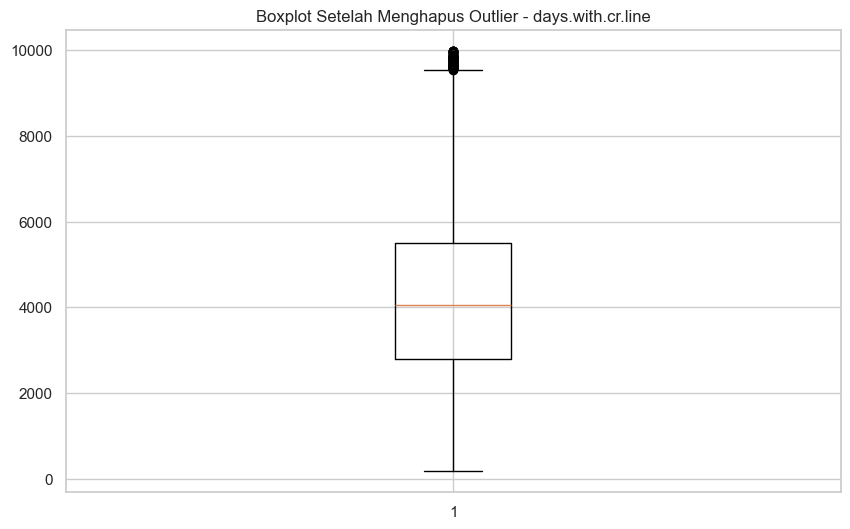

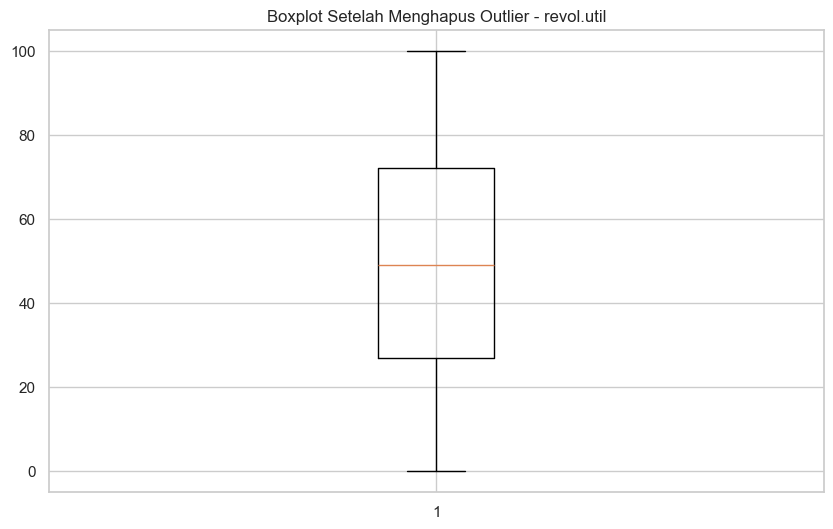

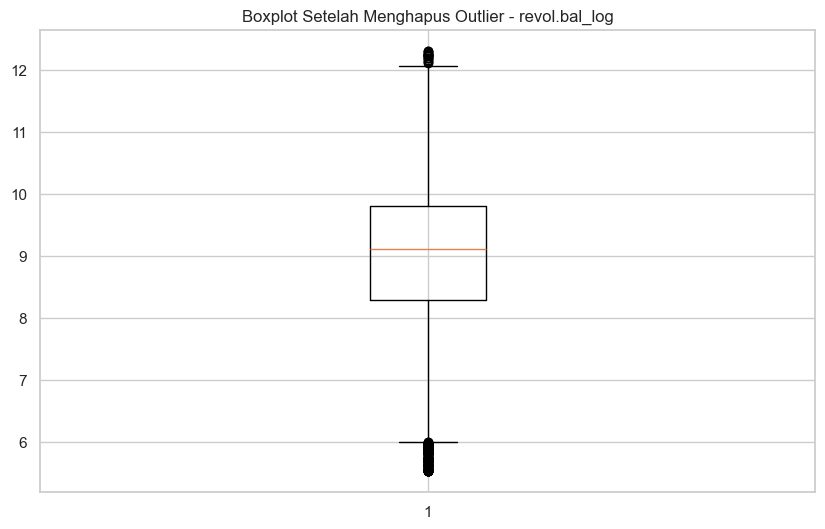

In [30]:
# Plot boxplot setelah menghapus outlier untuk setiap kolom numerik
for kolom in numerik_data_terfilter.columns:
    buat_boxplot(numerik_data_terfilter[kolom], f'Boxplot Setelah Menghapus Outlier - {kolom}')


In [31]:
# Menggabungkan kembali dengan kolom kategorikal
kategori_data = data.select_dtypes(include=['object'])
hasil_data = pd.concat([numerik_data_terfilter, kategori_data], axis=1)

# Menampilkan beberapa baris dari dataframe hasil
hasil_data = hasil_data.dropna()
hasil_data.head()

int.rate  installment  log.annual.inc    dti   fico  days.with.cr.line  \
0    0.1189       829.10       11.350407  19.48  737.0        5639.958333   
1    0.1071       228.22       11.082143  14.29  707.0        2760.000000   
2    0.1357       366.86       10.373491  11.63  682.0        4710.000000   
3    0.1008       162.34       11.350407   8.10  712.0        2699.958333   
4    0.1426       102.92       11.299732  14.97  667.0        4066.000000   

   revol.util  revol.bal_log credit.policy             purpose not.fully.paid  \
0        52.1      10.270039             1  debt_consolidation              0   
1        76.7      10.422995             1         credit_card              0   
2        25.6       8.163941             1  debt_consolidation              0   
3        73.2      10.424303             1  debt_consolidation              0   
4        39.5       8.464003             1         credit_card              0   

  inq_bin delinq_bin pubrec_bin  
0    bin1       bin1       bin1  
1    bin1       bin1       bin1  
2    bin2       bin1       bin1  
3    bin2       bin1       bin1  
4    bin1       bin2       bin1

In [32]:
hasil_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8202 entries, 0 to 9575
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int.rate           8202 non-null   float64
 1   installment        8202 non-null   float64
 2   log.annual.inc     8202 non-null   float64
 3   dti                8202 non-null   float64
 4   fico               8202 non-null   float64
 5   days.with.cr.line  8202 non-null   float64
 6   revol.util         8202 non-null   float64
 7   revol.bal_log      8202 non-null   float64
 8   credit.policy      8202 non-null   object 
 9   purpose            8202 non-null   object 
 10  not.fully.paid     8202 non-null   object 
 11  inq_bin            8202 non-null   object 
 12  delinq_bin         8202 non-null   object 
 13  pubrec_bin         8202 non-null   object 
dtypes: float64(8), object(6)
memory usage: 961.2+ KB


## EDA Data Bersih

In [33]:
# Desciptive statistics
print("\nStatistika Deskriptif Variabel Numerik")
hasil_data.describe().transpose()


Statistika Deskriptif Variabel Numerik


count         mean          std         min          25%  \
int.rate           8202.0     0.122155     0.025812    0.060000     0.103900   
installment        8202.0   306.636928   185.168646   15.760000   165.002500   
log.annual.inc     8202.0    10.914956     0.527782    9.433484    10.571317   
dti                8202.0    12.990377     6.758087    0.000000     7.810000   
fico               8202.0   709.080590    36.688743  612.000000   682.000000   
days.with.cr.line  8202.0  4288.562972  2004.557485  180.041667  2790.041667   
revol.util         8202.0    49.429583    27.533640    0.000000    26.800000   
revol.bal_log      8202.0     8.998401     1.204440    5.541264     8.285450   

                           50%          75%          max  
int.rate              0.122100     0.139200     0.194700  
installment         267.740000   411.410000   830.840000  
log.annual.inc       10.915088    11.264464    12.404924  
dti                  13.100000    18.220000    29.950000  
fico                702.000000   732.000000   817.000000  
days.with.cr.line  4050.000000  5490.000000  9990.041667  
revol.util           48.900000    72.075000   100.000000  
revol.bal_log         9.114875     9.804275    12.304609

In [34]:
print("\nStatistika Deskriptif Variabel Kategorik")
hasil_data.describe(include=object).transpose()


Statistika Deskriptif Variabel Kategorik


count unique                 top  freq
credit.policy   8202      2                   1  6705
purpose         8202      7  debt_consolidation  3592
not.fully.paid  8202      2                   0  6936
inq_bin         8202      4                bin2  3335
delinq_bin      8202      3                bin1  7284
pubrec_bin      8202      2                bin1  7708

In [35]:
#statistik deskriptif variabel numerik dengan pengelompokan berdasarkan 'not.fully.paid'
descriptive_stats = hasil_data.groupby('not.fully.paid').describe().transpose()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

descriptive_stats

not.fully.paid                     0            1
int.rate          count  6936.000000  1266.000000
                  mean      0.120453     0.131481
                  std       0.025803     0.023795
                  min       0.060000     0.070500
                  25%       0.100800     0.115800
                  50%       0.121800     0.131600
                  75%       0.137900     0.146100
                  max       0.194700     0.194700
installment       count  6936.000000  1266.000000
                  mean    304.134498   320.346919
                  std     184.327224   189.199674
                  min      15.760000    21.590000
                  25%     163.770000   169.250000
                  50%     265.630000   282.385000
                  75%     408.820000   446.080000
                  max     829.100000   830.840000
log.annual.inc    count  6936.000000  1266.000000
                  mean     10.924317    10.863672
                  std       0.522072     0.555452
                  min       9.454071     9.433484
                  25%      10.591421    10.491274
                  50%      10.915088    10.858999
                  75%      11.277152    11.225243
                  max      12.404924    12.388394
dti               count  6936.000000  1266.000000
                  mean     12.867687    13.662551
                  std       6.743014     6.803583
                  min       0.000000     0.000000
                  25%       7.670000     8.475000
                  50%      12.935000    13.740000
                  75%      18.102500    19.145000
                  max      29.950000    29.600000
fico              count  6936.000000  1266.000000
                  mean    711.443483   696.135071
                  std      36.926049    32.450362
                  min     612.000000   617.000000
                  25%     682.000000   672.000000
                  50%     707.000000   692.000000
                  75%     737.000000   717.000000
                  max     817.000000   807.000000
days.with.cr.line count  6936.000000  1266.000000
                  mean   4299.971117  4226.061480
                  std    2005.802745  1997.354804
                  min     180.041667   238.958333
                  25%    2790.000000  2827.500000
                  50%    4050.000000  4020.000000
                  75%    5520.000000  5422.500000
                  max    9990.041667  9900.000000
revol.util        count  6936.000000  1266.000000
                  mean     48.295998    55.640126
                  std      27.513126    26.818734
                  min       0.000000     0.000000
                  25%      25.300000    34.300000
                  50%      47.500000    56.100000
                  75%      70.900000    78.375000
                  max     100.000000   100.000000
revol.bal_log     count  6936.000000  1266.000000
                  mean      8.985688     9.068054
                  std       1.197708     1.238844
                  min       5.541264     5.541264
                  25%       8.272315     8.345692
                  50%       9.106423     9.167640
                  75%       9.787824     9.901544
                  max      12.268479    12.304609

In [36]:
#statistik deskriptif variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
cat_columns = hasil_data.select_dtypes(include=['object', 'category']).columns
for column in cat_columns:
    print(f"\nStatistik Deskriptif untuk {column} yang dikelompokkan berdasarkan 'not.fully.paid':")
    grouped = hasil_data.groupby(['not.fully.paid', column]).size().unstack(fill_value=0)
    display(grouped)


Statistik Deskriptif untuk credit.policy yang dikelompokkan berdasarkan 'not.fully.paid':


credit.policy      0     1
not.fully.paid            
0               1082  5854
1                415   851


Statistik Deskriptif untuk purpose yang dikelompokkan berdasarkan 'not.fully.paid':


purpose         all_other  credit_card  debt_consolidation  educational  \
not.fully.paid                                                            
0                    1609          989                3049          214   
1                     310          124                 543           53   

purpose         home_improvement  major_purchase  small_business  
not.fully.paid                                                    
0                            430             309             336  
1                             80              34             122


Statistik Deskriptif untuk not.fully.paid yang dikelompokkan berdasarkan 'not.fully.paid':


not.fully.paid     0     1
not.fully.paid            
0               6936     0
1                  0  1266


Statistik Deskriptif untuk inq_bin yang dikelompokkan berdasarkan 'not.fully.paid':


inq_bin         bin1  bin2  bin3  bin4
not.fully.paid                        
0               2764  2860  1074   238
1                359   475   296   136


Statistik Deskriptif untuk delinq_bin yang dikelompokkan berdasarkan 'not.fully.paid':


delinq_bin      bin1  bin2  bin3
not.fully.paid                  
0               6173   571   192
1               1111   116    39


Statistik Deskriptif untuk pubrec_bin yang dikelompokkan berdasarkan 'not.fully.paid':


pubrec_bin      bin1  bin2
not.fully.paid            
0               6561   375
1               1147   119

### Visualisasi data Bersih

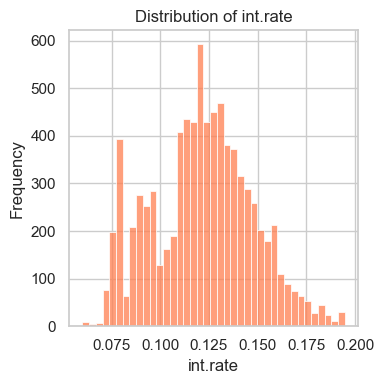

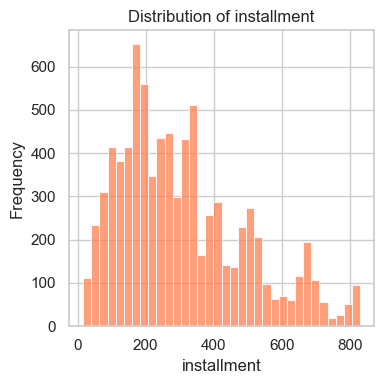

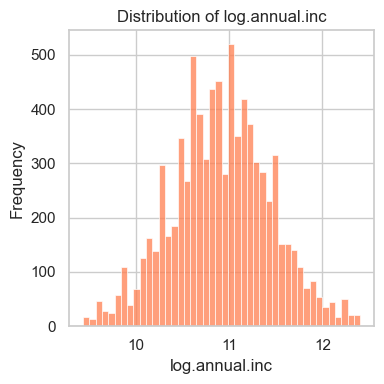

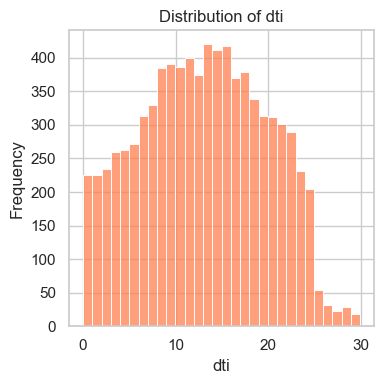

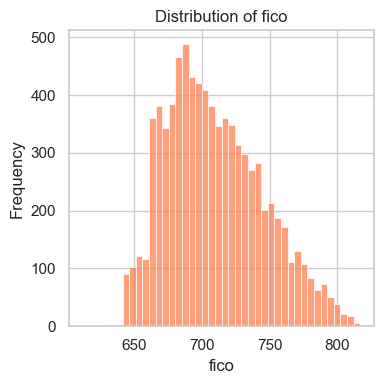

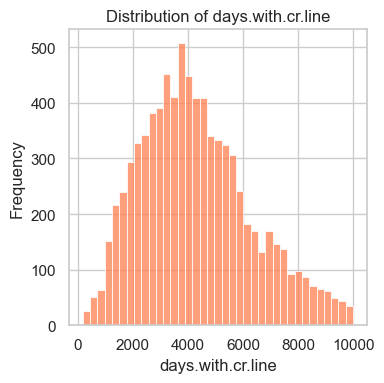

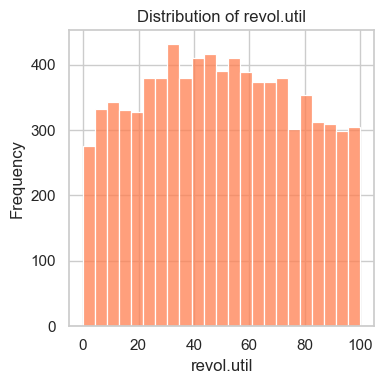

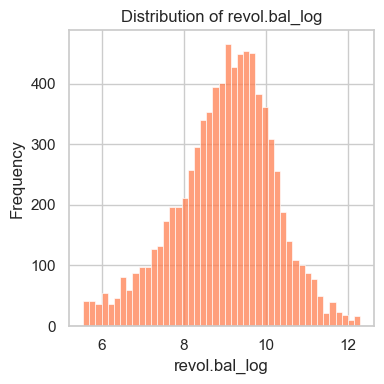

In [37]:
# Variabel Numerik
num_columns = hasil_data.select_dtypes(include=['number']).columns
for column in num_columns :
    fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))

    # Histogram 
    sns.histplot(hasil_data[column], kde=False, color='coral', ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


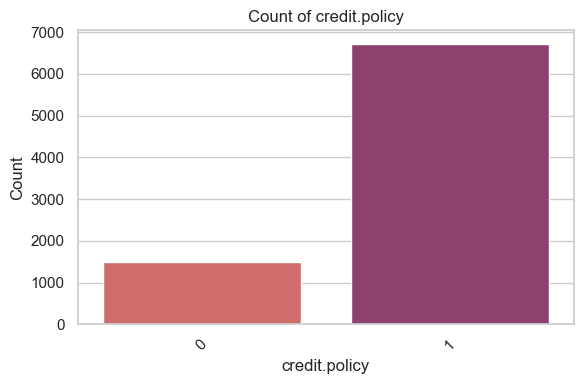

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


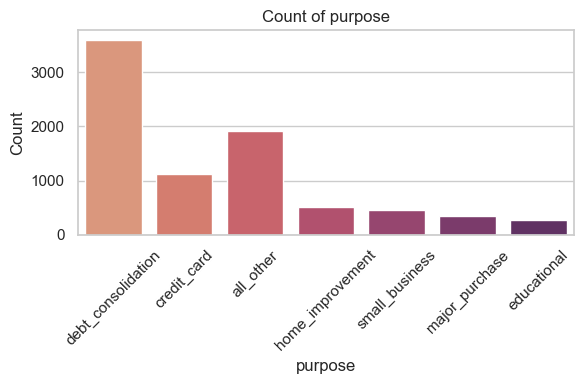

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


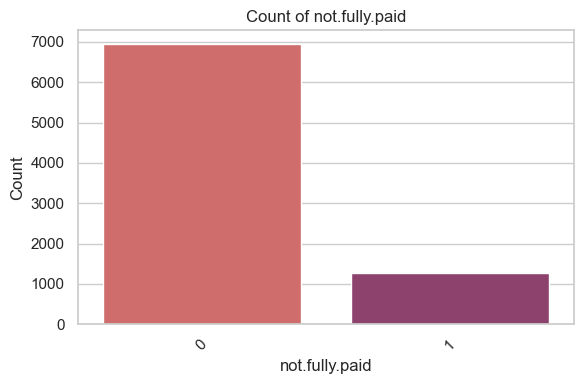

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


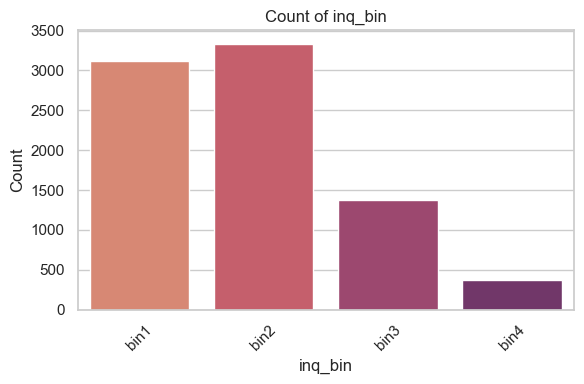

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


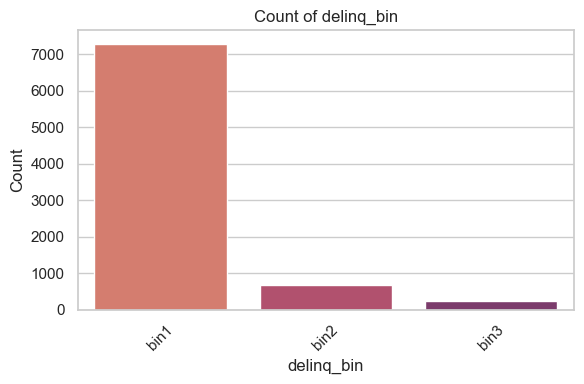

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\1878709926.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=hasil_data, palette='flare')


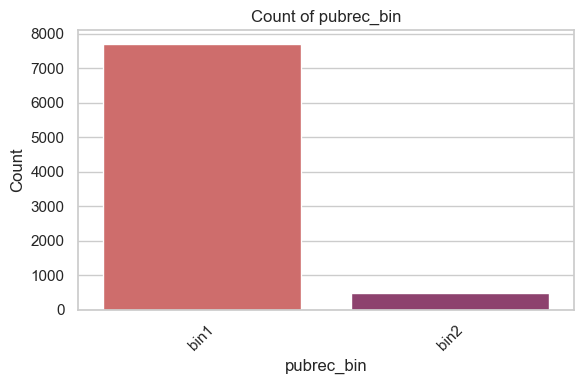

In [38]:
# Variabel Kategorik
cat_columns = hasil_data.select_dtypes(include=['object', 'category']).columns
for column in cat_columns:
    plt.figure(figsize=(6, 4))  # Ukuran gambar dapat disesuaikan
    sns.countplot(x=column, data=hasil_data, palette='flare')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotasi label sumbu x jika perlu
    
    plt.tight_layout()
    plt.show()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


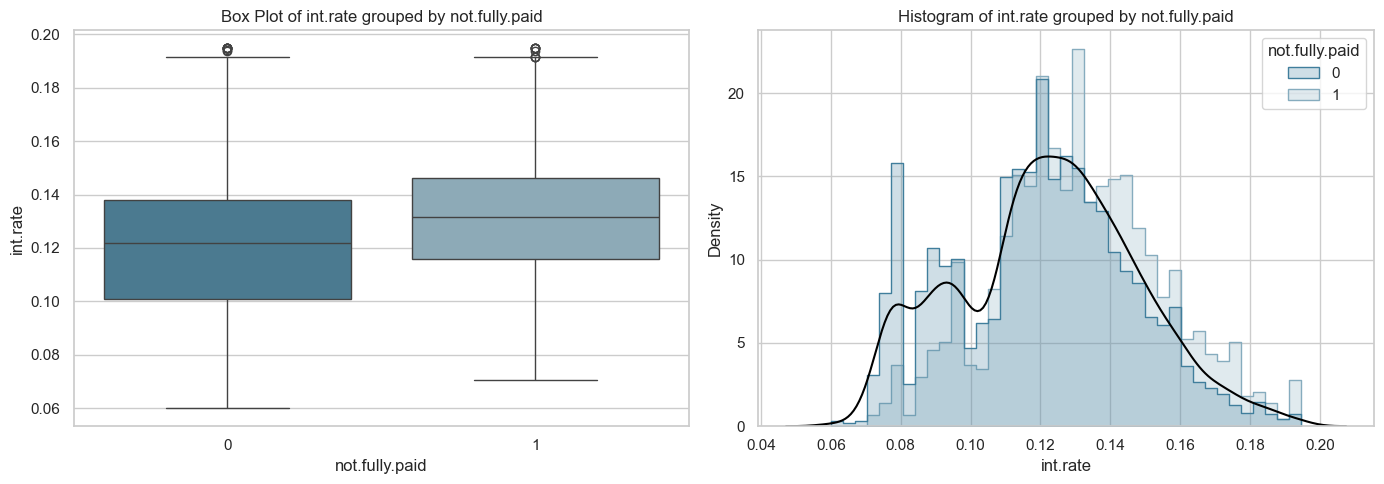

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


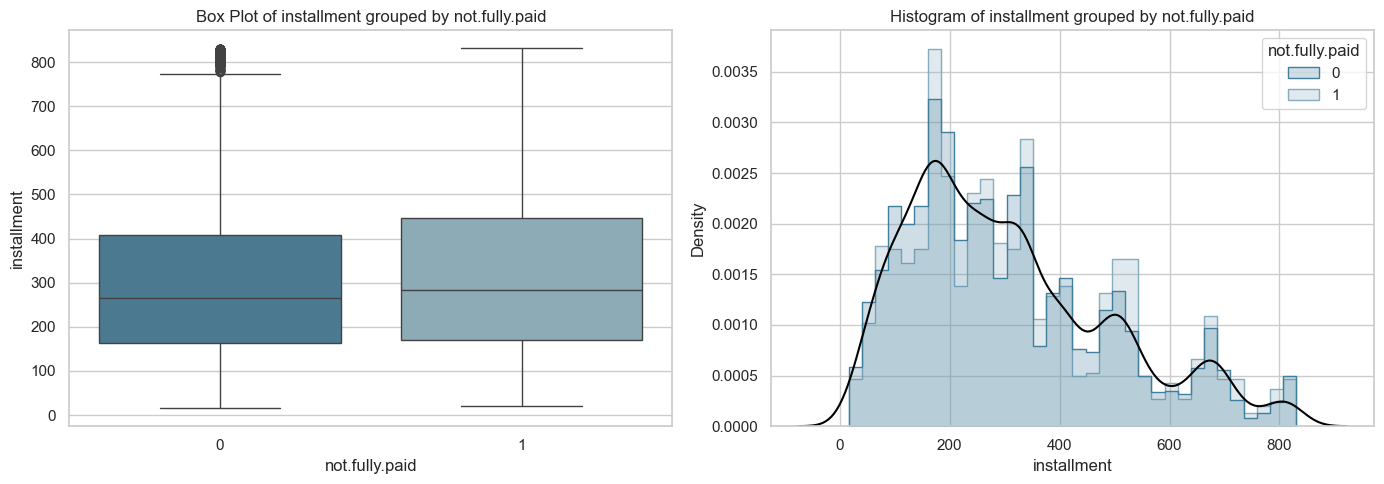

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


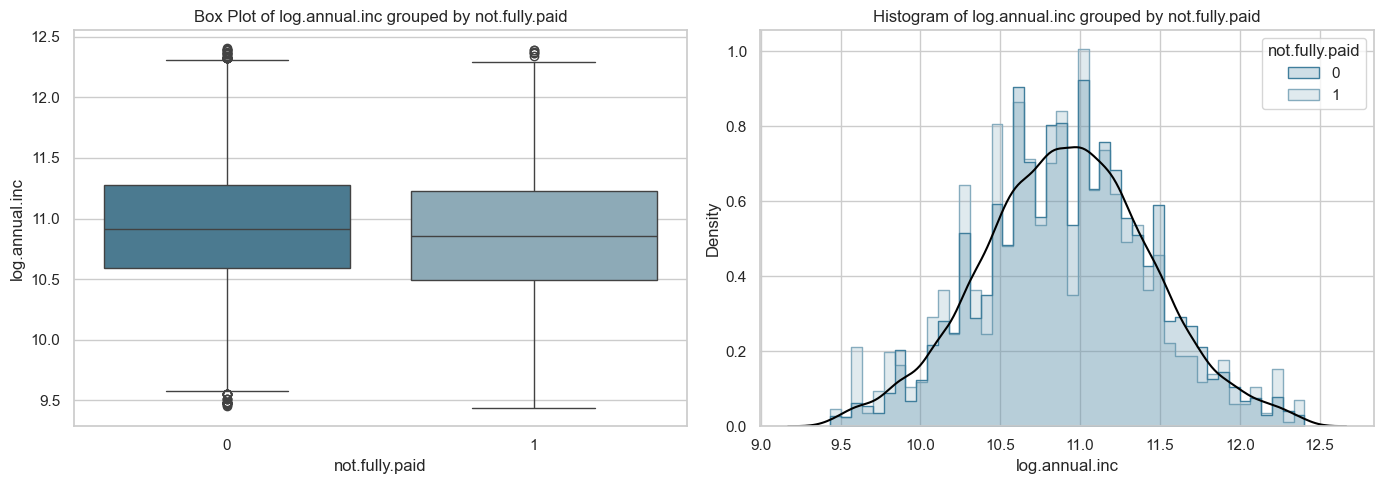

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


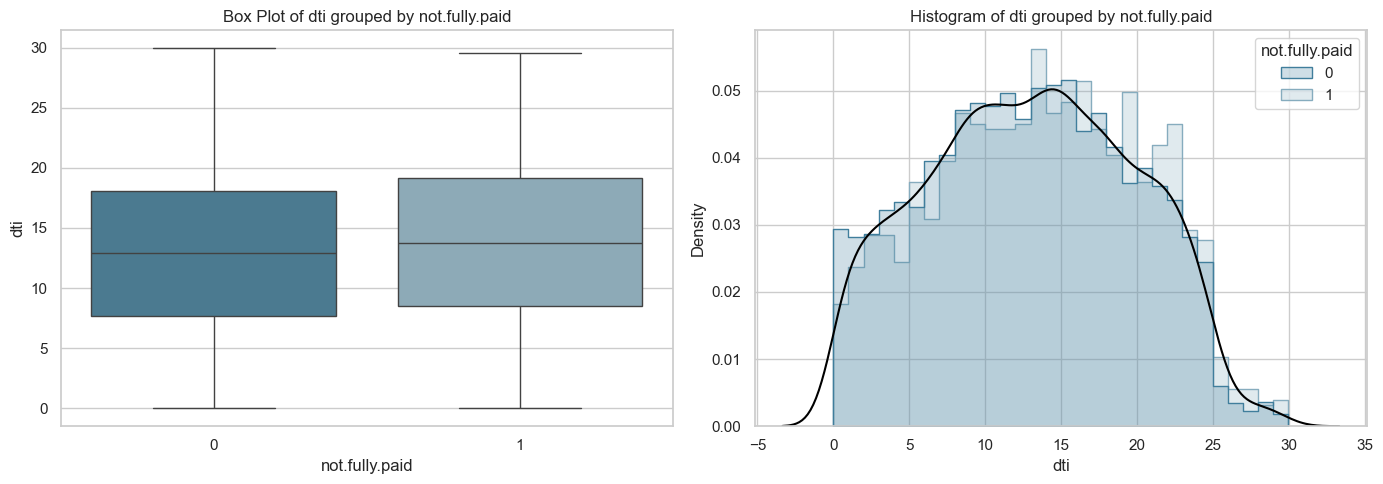

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


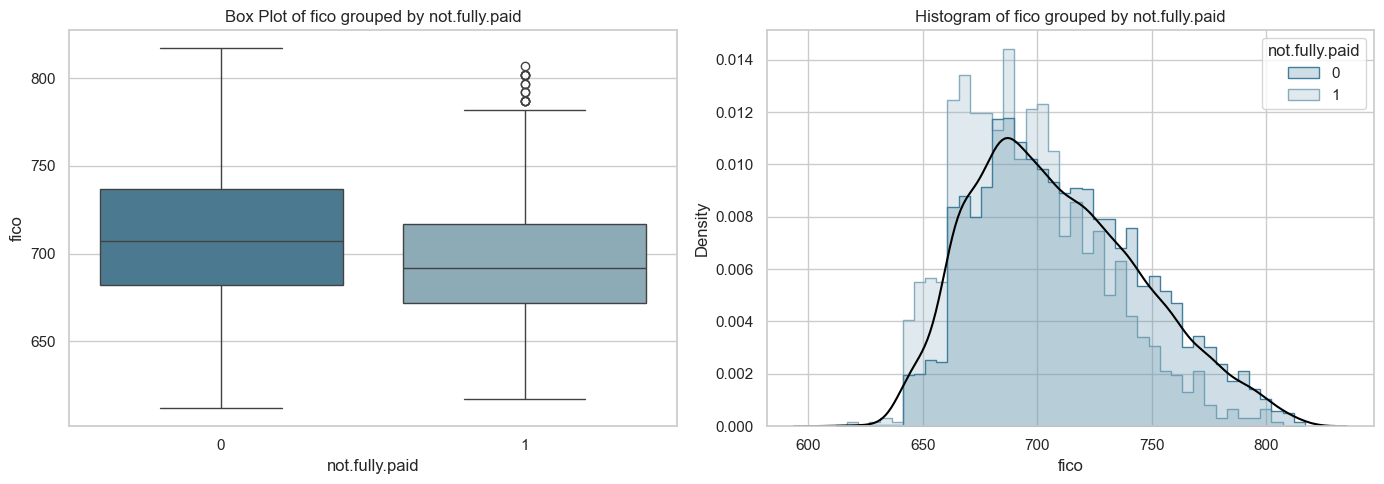

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


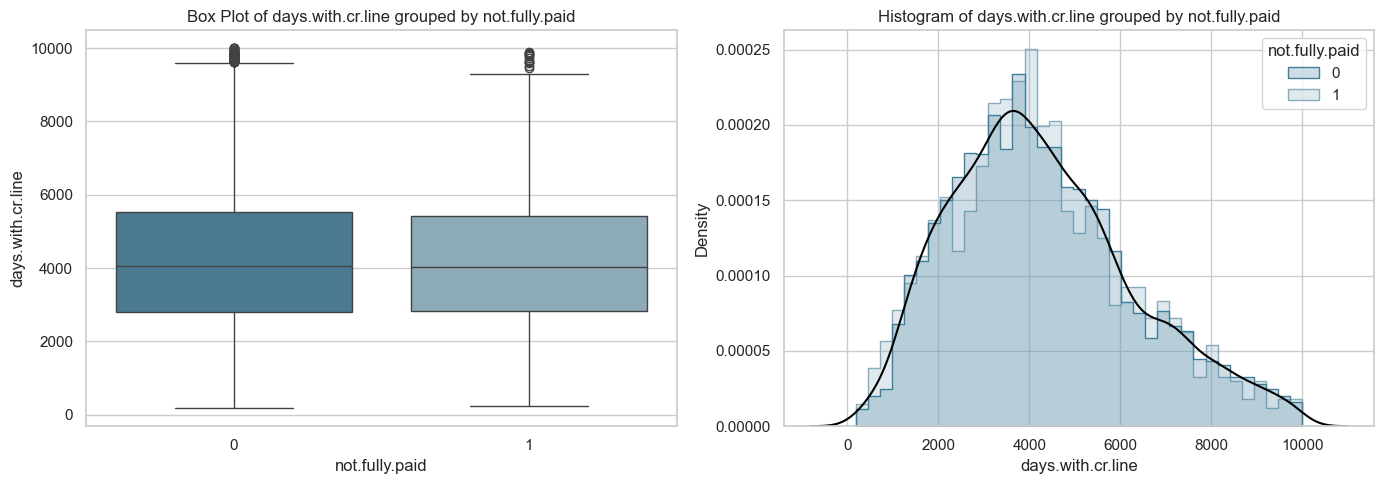

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


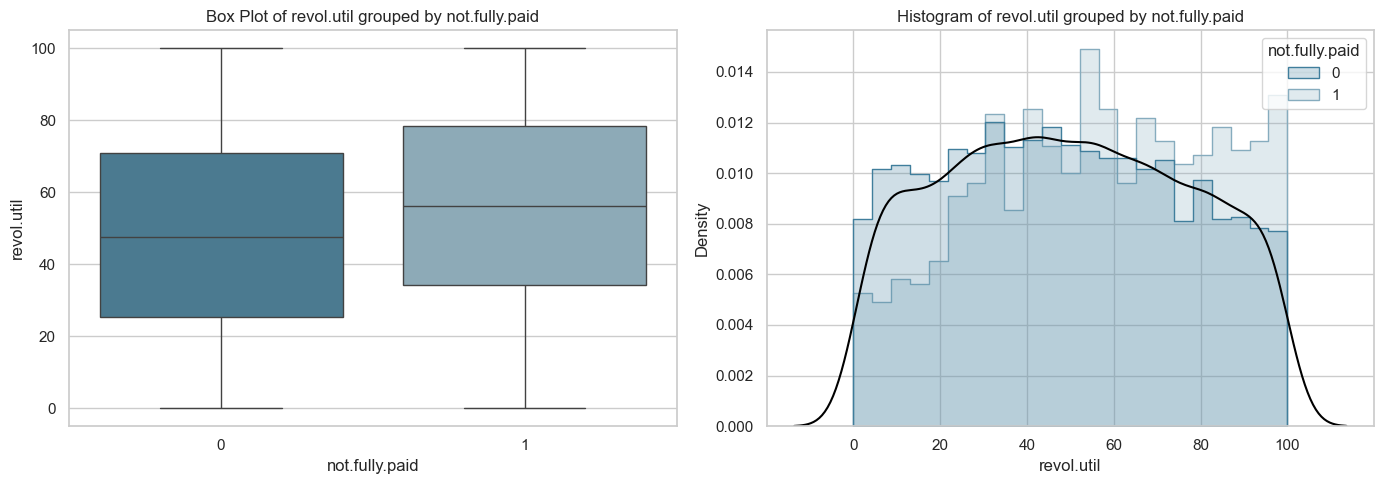

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:8: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_324\2071899773.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])


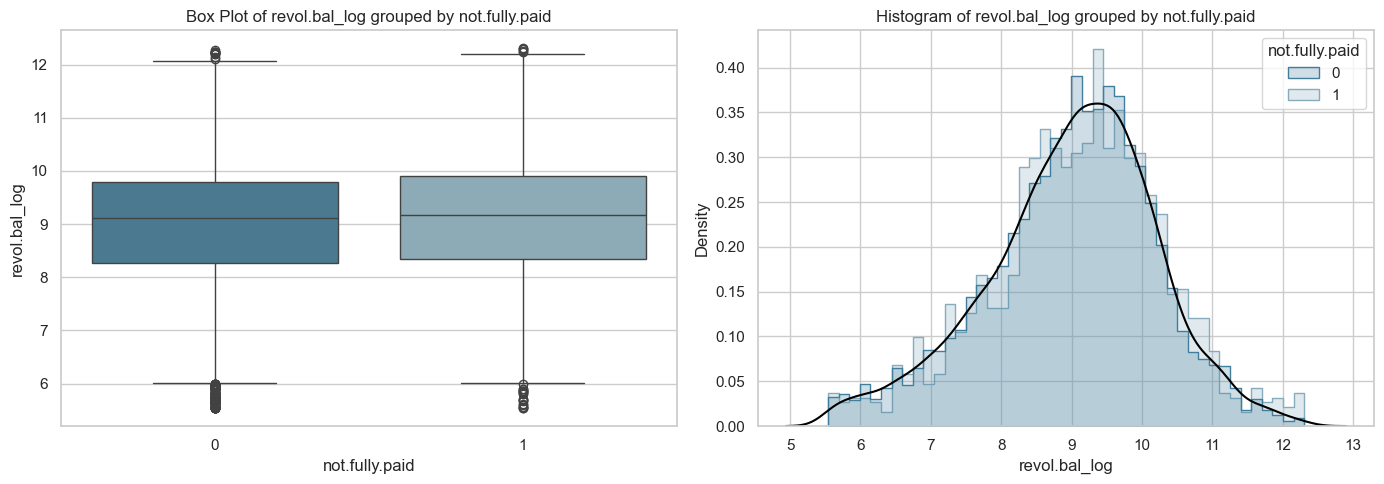

In [39]:
# Visualisasi variabel numerik pengelompokan berdasarkan 'not.fully.paid'
data = hasil_data
cmap = sns.diverging_palette(230, 20, as_cmap=False)
for column in num_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
      # Histogram
    sns.histplot(data=data, x=column, hue='not.fully.paid', element='step', palette=cmap, stat='density', common_norm=False, ax=axes[1])
    sns.kdeplot(data=data[column], color='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column} grouped by not.fully.paid')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Density')
    
    # Boxplot
    sns.boxplot(x='not.fully.paid', y=column, data=data, palette=cmap, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column} grouped by not.fully.paid')
    axes[0].set_xlabel('not.fully.paid')
    axes[0].set_ylabel(column)
    
    plt.tight_layout()
    plt.show()

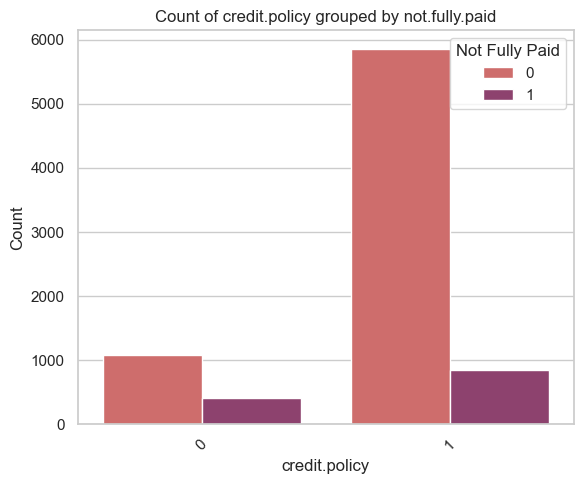

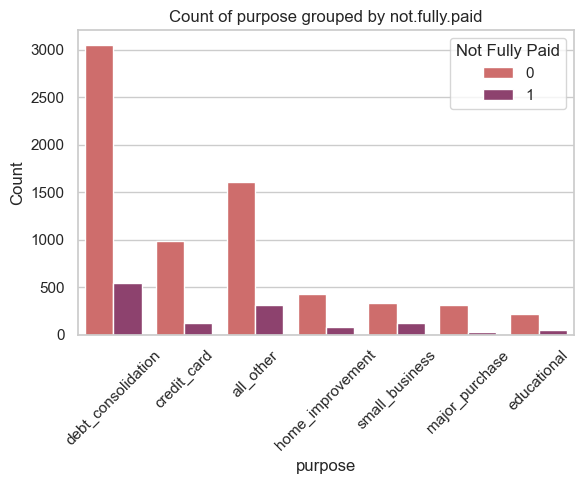

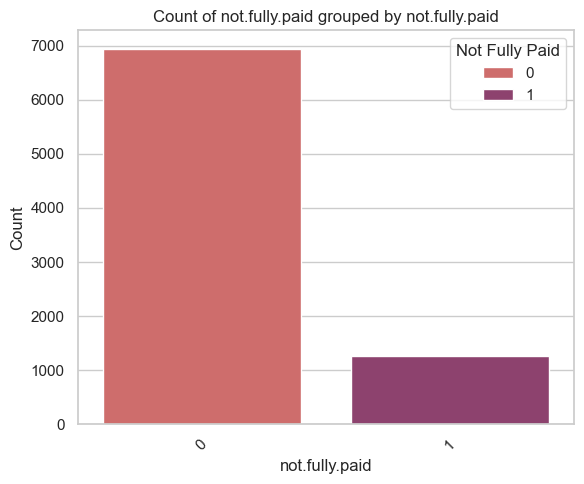

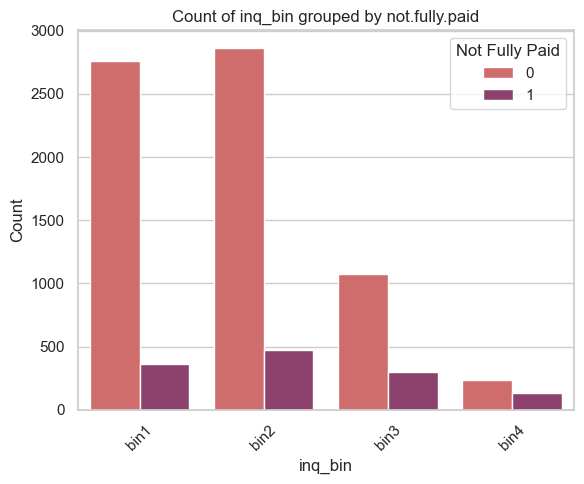

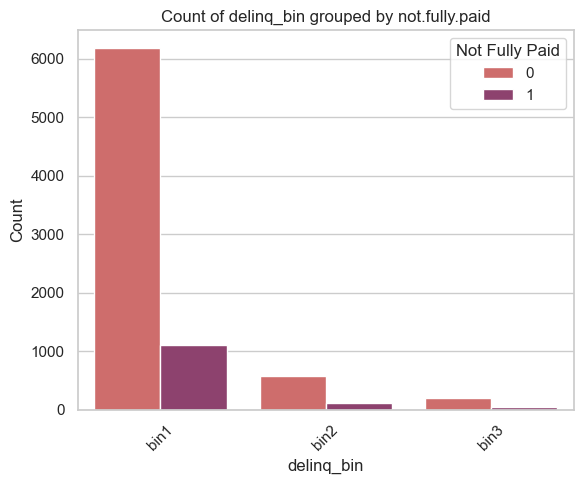

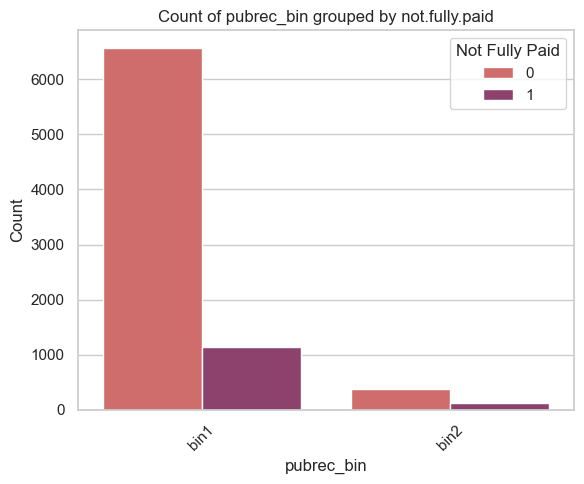

In [40]:
# Visualisasi variabel kategorik dengan pengelompokan berdasarkan 'not.fully.paid'
sns.set(style="whitegrid")

# Memilih kolom kategorik
cat_columns = data.select_dtypes(include=['object', 'category']).columns

# Membuat barchart untuk setiap kolom kategorik
for column in cat_columns:
    plt.figure(figsize=(6, 5))
    sns.countplot(x=column, hue='not.fully.paid', data=data, palette='flare')
    plt.title(f'Count of {column} grouped by not.fully.paid')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Not Fully Paid')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

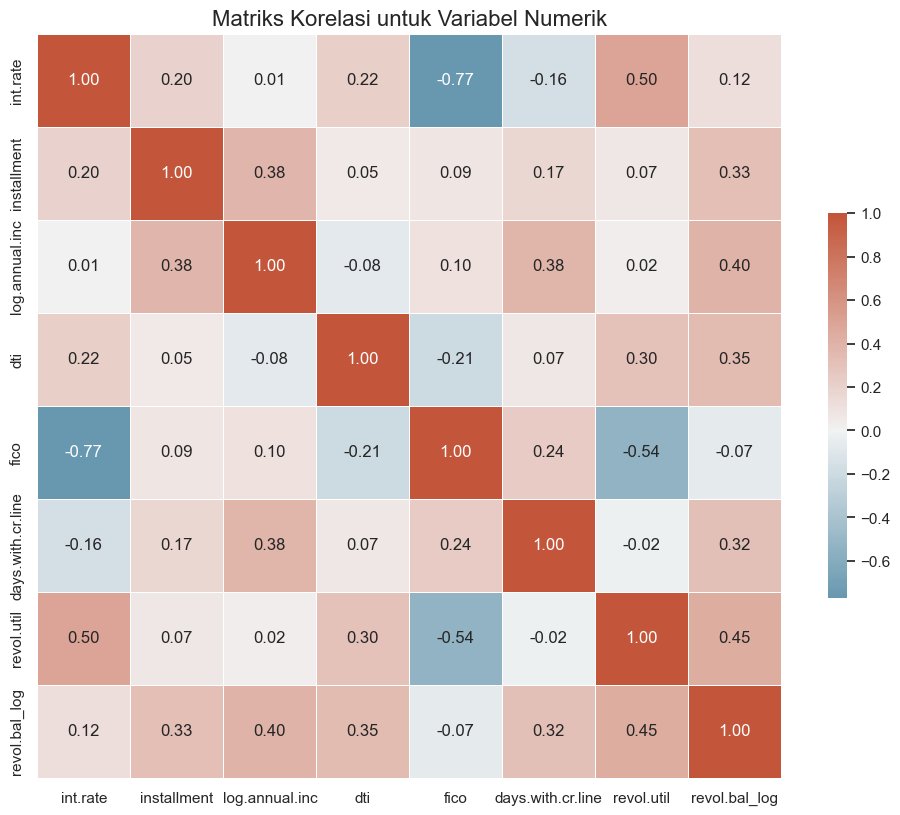

In [41]:
# Hitung matriks korelasi untuk fitur numerik 
num_columns = hasil_data.select_dtypes(include=['number']).columns
corr_matrix = hasil_data[num_columns].corr(method='spearman')

# Siapkan figure matplotlib
plt.figure(figsize=(12, 10))

# Buat colormap diverging custom
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Gambar heatmap dengan mask dan rasio aspek yang benar
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriks Korelasi untuk Variabel Numerik', fontsize=16)
plt.show()


In [42]:
## Cek data duplikat
# Memeriksa data duplikat
duplikat = hasil_data.duplicated()
print(f"Jumlah baris duplikat: {duplikat.sum()}")

# Menghapus data duplikat
hasil_data_bersih = hasil_data.drop_duplicates()

# Menampilkan beberapa baris dari dataframe hasil
hasil_data_bersih.head()

Jumlah baris duplikat: 0


int.rate  installment  log.annual.inc    dti   fico  days.with.cr.line  \
0    0.1189       829.10       11.350407  19.48  737.0        5639.958333   
1    0.1071       228.22       11.082143  14.29  707.0        2760.000000   
2    0.1357       366.86       10.373491  11.63  682.0        4710.000000   
3    0.1008       162.34       11.350407   8.10  712.0        2699.958333   
4    0.1426       102.92       11.299732  14.97  667.0        4066.000000   

   revol.util  revol.bal_log credit.policy             purpose not.fully.paid  \
0        52.1      10.270039             1  debt_consolidation              0   
1        76.7      10.422995             1         credit_card              0   
2        25.6       8.163941             1  debt_consolidation              0   
3        73.2      10.424303             1  debt_consolidation              0   
4        39.5       8.464003             1         credit_card              0   

  inq_bin delinq_bin pubrec_bin  
0    bin1       bin1       bin1  
1    bin1       bin1       bin1  
2    bin2       bin1       bin1  
3    bin2       bin1       bin1  
4    bin1       bin2       bin1

In [43]:
hasil_data_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8202 entries, 0 to 9575
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   int.rate           8202 non-null   float64
 1   installment        8202 non-null   float64
 2   log.annual.inc     8202 non-null   float64
 3   dti                8202 non-null   float64
 4   fico               8202 non-null   float64
 5   days.with.cr.line  8202 non-null   float64
 6   revol.util         8202 non-null   float64
 7   revol.bal_log      8202 non-null   float64
 8   credit.policy      8202 non-null   object 
 9   purpose            8202 non-null   object 
 10  not.fully.paid     8202 non-null   object 
 11  inq_bin            8202 non-null   object 
 12  delinq_bin         8202 non-null   object 
 13  pubrec_bin         8202 non-null   object 
dtypes: float64(8), object(6)
memory usage: 961.2+ KB


## Encoding Variabel Kategorik

In [44]:
data = hasil_data_bersih

# Mengubah variabel kategorik menjadi numerik
data['credit.policy'] = LabelEncoder().fit_transform(data['credit.policy'])
data['not.fully.paid'] = LabelEncoder().fit_transform(data['not.fully.paid'])

In [45]:
# Encoding pada data binning
# daftar variabel kategorik hasil binning
binned_categorical_features = ['inq_bin', 'delinq_bin', 'pubrec_bin']

# Mengganti nama variabel
updated_binned_categorical_features = ['inq.last.6mths_bin', 'delinq.2yrs_bin', 'pub.rec_bin']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# menerapkan encoding variabel
for feature, updated_feature_name in zip(binned_categorical_features, updated_binned_categorical_features):
    data[updated_feature_name] = label_encoder.fit_transform(data[feature])
    data.drop(feature, axis=1, inplace=True)  # Drop the original feature

data.head().style

In [46]:
# Mengaplikasikan one-hot encoding pada 'purpose'
one_hot_encoded = pd.get_dummies(data['purpose'], prefix='purpose')

# menggabungkan data hasil one hot encoding dengan data asli
data = pd.concat([data, one_hot_encoded], axis=1)

# drop data purpose
data.drop('purpose', axis=1, inplace=True)

data.head().style

In [47]:
data.head()

int.rate  installment  log.annual.inc    dti   fico  days.with.cr.line  \
0    0.1189       829.10       11.350407  19.48  737.0        5639.958333   
1    0.1071       228.22       11.082143  14.29  707.0        2760.000000   
2    0.1357       366.86       10.373491  11.63  682.0        4710.000000   
3    0.1008       162.34       11.350407   8.10  712.0        2699.958333   
4    0.1426       102.92       11.299732  14.97  667.0        4066.000000   

   revol.util  revol.bal_log  credit.policy  not.fully.paid  \
0        52.1      10.270039              1               0   
1        76.7      10.422995              1               0   
2        25.6       8.163941              1               0   
3        73.2      10.424303              1               0   
4        39.5       8.464003              1               0   

   inq.last.6mths_bin  delinq.2yrs_bin  pub.rec_bin  purpose_all_other  \
0                   0                0            0              False   
1                   0                0            0              False   
2                   1                0            0              False   
3                   1                0            0              False   
4                   0                1            0              False   

   purpose_credit_card  purpose_debt_consolidation  purpose_educational  \
0                False                        True                False   
1                 True                       False                False   
2                False                        True                False   
3                False                        True                False   
4                 True                       False                False   

   purpose_home_improvement  purpose_major_purchase  purpose_small_business  
0                     False                   False                   False  
1                     False                   False                   False  
2                     False                   False                   False  
3                     False                   False                   False  
4                     False                   False                   False

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8202 entries, 0 to 9575
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int.rate                    8202 non-null   float64
 1   installment                 8202 non-null   float64
 2   log.annual.inc              8202 non-null   float64
 3   dti                         8202 non-null   float64
 4   fico                        8202 non-null   float64
 5   days.with.cr.line           8202 non-null   float64
 6   revol.util                  8202 non-null   float64
 7   revol.bal_log               8202 non-null   float64
 8   credit.policy               8202 non-null   int32  
 9   not.fully.paid              8202 non-null   int32  
 10  inq.last.6mths_bin          8202 non-null   int32  
 11  delinq.2yrs_bin             8202 non-null   int32  
 12  pub.rec_bin                 8202 non-null   int32  
 13  purpose_all_other           8202 non-n

## StandardScaler

In [49]:
# Fitur yang akan di-transformasi (kecuali 'not.fully.paid')
fitur_yang_ditransformasi = data.select_dtypes(include='float64').columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Salin DataFrame untuk hasil transformasi
df_transformed = data.copy()

# Lakukan fit transform pada fitur-fitur yang akan di-transformasi
df_transformed[fitur_yang_ditransformasi] = scaler.fit_transform(df_transformed[fitur_yang_ditransformasi])

# Menampilkan hasil transformasi
for col in df_transformed.select_dtypes(include=['bool']).columns:
    df_transformed[col] = df_transformed[col].astype(int)
df_transformed.head()

int.rate  installment  log.annual.inc       dti      fico  \
0 -0.126106     2.821725        0.825108  0.960334  0.761027   
1 -0.583292    -0.423515        0.316791  0.192318 -0.056713   
2  0.524802     0.325253       -1.025988 -0.201308 -0.738162   
3 -0.827383    -0.779321        0.825108 -0.723677  0.079577   
4  0.792139    -1.100237        0.729088  0.292944 -1.147032   

   days.with.cr.line  revol.util  revol.bal_log  credit.policy  \
0           0.674203    0.096993       1.055856              1   
1          -0.762590    0.990500       1.182857              1   
2           0.210252   -0.865524      -0.692862              1   
3          -0.792545    0.863375       1.183943              1   
4          -0.111035   -0.360657      -0.443717              1   

   not.fully.paid  inq.last.6mths_bin  delinq.2yrs_bin  pub.rec_bin  \
0               0                   0                0            0   
1               0                   0                0            0   
2               0                   1                0            0   
3               0                   1                0            0   
4               0                   0                1            0   

   purpose_all_other  purpose_credit_card  purpose_debt_consolidation  \
0                  0                    0                           1   
1                  0                    1                           0   
2                  0                    0                           1   
3                  0                    0                           1   
4                  0                    1                           0   

   purpose_educational  purpose_home_improvement  purpose_major_purchase  \
0                    0                         0                       0   
1                    0                         0                       0   
2                    0                         0                       0   
3                    0                         0                       0   
4                    0                         0                       0   

   purpose_small_business  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [50]:
df_transformed['purpose_major_purchase'].unique()

array([0, 1])

### Deteksi Multikolinearitas

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_transformed[['int.rate','installment','log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.util', 
                    'revol.bal_log']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             Feature       VIF
0           int.rate  2.956392
1        installment  1.507584
2     log.annual.inc  1.512191
3                dti  1.267909
4               fico  3.163201
5  days.with.cr.line  1.291504
6         revol.util  1.926935
7      revol.bal_log  1.861569


# 4. Classification Algorithms

## Feature Selection

                       feature  importance
6                   revol.util    0.115904
5            days.with.cr.line    0.115085
7                revol.bal_log    0.115052
1                  installment    0.114445
2               log.annual.inc    0.111844
3                          dti    0.111721
0                     int.rate    0.104090
4                         fico    0.078411
9           inq.last.6mths_bin    0.035008
8                credit.policy    0.016772
10             delinq.2yrs_bin    0.013299
14  purpose_debt_consolidation    0.013201
12           purpose_all_other    0.012112
18      purpose_small_business    0.009651
11                 pub.rec_bin    0.009128
13         purpose_credit_card    0.007516
16    purpose_home_improvement    0.006554
15         purpose_educational    0.006123
17      purpose_major_purchase    0.004084


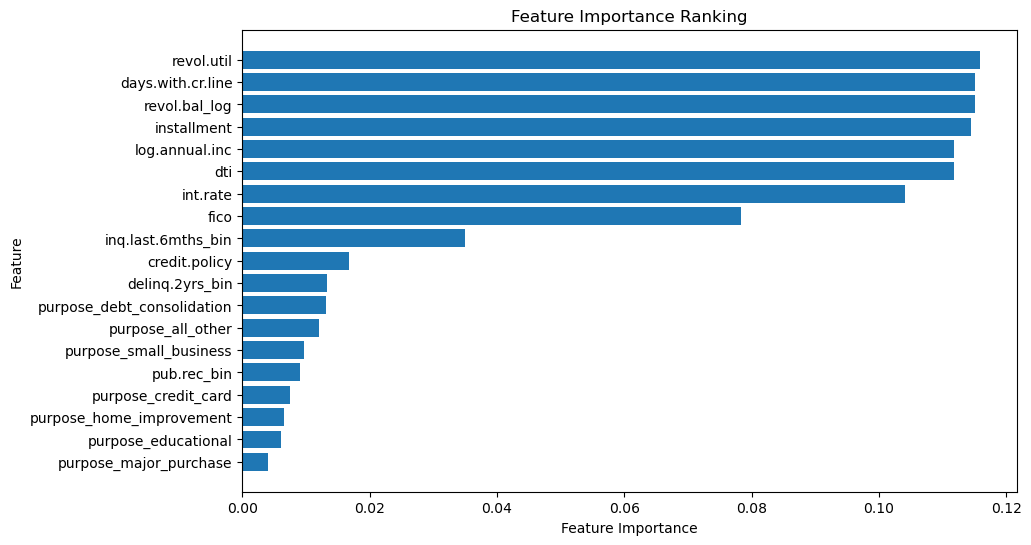

Threshold used for feature selection: 0.016772061910134986
Number of selected features: 10
Selected Features:
Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.util', 'revol.bal_log', 'credit.policy',
       'inq.last.6mths_bin'],
      dtype='object')


In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

data = df_transformed

# Separate features and target variable
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

# Melatih model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Mendapatkan importance fitur
importances = rf.feature_importances_

# Membuat DataFrame untuk fitur dan importance-nya
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Mengurutkan fitur berdasarkan importance
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Menampilkan peringkat fitur
print(feature_importances)

# Visualisasi importance fitur
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()
plt.show()

# Menggunakan SelectFromModel untuk memilih fitur penting
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X, y)

# Mendapatkan threshold yang digunakan
threshold = sfm.threshold_

# Menampilkan threshold
print("Threshold used for feature selection:", threshold)

# Mengubah dataset dengan hanya fitur yang dipilih
X_selected = sfm.transform(X)

# Mendapatkan nama-nama fitur yang dipilih
selected_features = X.columns[sfm.get_support()]

# Membuat DataFrame baru dengan fitur yang dipilih
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Menampilkan jumlah fitur yang dipilih
num_selected_features = len(selected_features)
print("Number of selected features:", num_selected_features)

# Menampilkan fitur yang dipilih
print("Selected Features:")
print(selected_features)

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = df_transformed

# Pisahkan fitur dan target
X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Fungsi untuk melakukan RFE tanpa cross-validation
def evaluate_rfe(n_features):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X, y)
    selected_features = X.columns[rfe.support_]
    return selected_features

# Loop untuk membandingkan performa dengan berbagai jumlah fitur terpilih
results = []
for n in range(1, X.shape[1] + 1):  # Dari 1 hingga jumlah total fitur
    selected_features = evaluate_rfe(n)
    model.fit(X[selected_features], y)
    y_pred_proba = model.predict_proba(X[selected_features])[:, 1]  # Probabilitas kelas positif
    roc_auc = roc_auc_score(y, y_pred_proba)
    results.append((n, selected_features, roc_auc))

# Menentukan jumlah fitur terbaik berdasarkan performa
best_n, best_features, best_roc_auc = max(results, key=lambda x: x[2])

# Tampilkan hasil
print(f"Best number of features: {best_n}")
print(f"Selected features: {best_features}")
print(f"ROC AUC score: {best_roc_auc:.4f}")

# Tampilkan ranking dari semua fitur
rfe_final = RFE(estimator=model, n_features_to_select=best_n)
rfe_final.fit(X, y)
ranking = rfe_final.ranking_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print("\nFeature ranking:")
print(feature_ranking)


Best number of features: 3
Selected features: Index(['installment', 'revol.util', 'revol.bal_log'], dtype='object')
ROC AUC score: 1.0000

Feature ranking:
                       Feature  Ranking
1                  installment        1
6                   revol.util        1
7                revol.bal_log        1
5            days.with.cr.line        2
3                          dti        3
0                     int.rate        4
2               log.annual.inc        5
4                         fico        6
9           inq.last.6mths_bin        7
14  purpose_debt_consolidation        8
8                credit.policy        9
12           purpose_all_other       10
10             delinq.2yrs_bin       11
18      purpose_small_business       12
11                 pub.rec_bin       13
13         purpose_credit_card       14
16    purpose_home_improvement       15
15         purpose_educational       16
17      purpose_major_purchase       17


In [42]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

data = df_transformed

# Pisahkan fitur dan target
X = data.drop(columns=['not.fully.paid'])
y = data['not.fully.paid']

# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

# Fungsi untuk melakukan RFE tanpa cross-validation
def evaluate_rfe(n_features):
    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X, y)
    selected_features = X.columns[rfe.support_]
    return selected_features

# Loop untuk membandingkan performa dengan berbagai jumlah fitur terpilih
results = []
for n in range(1, X.shape[1] + 1):  # Dari 1 hingga jumlah total fitur
    selected_features = evaluate_rfe(n)
    model.fit(X[selected_features], y)
    score = model.score(X[selected_features], y)
    results.append((n, selected_features, score))

# Menentukan jumlah fitur terbaik berdasarkan performa
best_n, best_features, best_score = max(results, key=lambda x: x[2])

# Tampilkan hasil
print(f"Best number of features: {best_n}")
print(f"Selected features: {best_features}")
print(f"Training score: {best_score:.4f}")

# Tampilkan ranking dari semua fitur
rfe_final = RFE(estimator=model, n_features_to_select=best_n)
rfe_final.fit(X, y)
ranking = rfe_final.ranking_
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': ranking})
feature_ranking = feature_ranking.sort_values(by='Ranking')

print("\nFeature ranking:")
print(feature_ranking)

Best number of features: 6
Selected features: Index(['int.rate', 'installment', 'dti', 'days.with.cr.line', 'revol.util',
       'revol.bal_log'],
      dtype='object')
Training score: 1.0000

Feature ranking:
                       Feature  Ranking
0                     int.rate        1
1                  installment        1
3                          dti        1
5            days.with.cr.line        1
6                   revol.util        1
7                revol.bal_log        1
2               log.annual.inc        2
4                         fico        3
9           inq.last.6mths_bin        4
14  purpose_debt_consolidation        5
8                credit.policy        6
12           purpose_all_other        7
10             delinq.2yrs_bin        8
18      purpose_small_business        9
11                 pub.rec_bin       10
13         purpose_credit_card       11
16    purpose_home_improvement       12
15         purpose_educational       13
17      purpose_major_purchase

In [52]:
# List of selected features berdasarkan RFE random Forest
selected_features = ['int.rate', 'installment', 'dti', 'days.with.cr.line',
       'revol.util', 'revol.bal_log'
]

# Add the target variable 'stroke' to the list of selected features
selected_features.append('not.fully.paid')

# Create a new DataFrame with only the selected features and the target variable
new_data = data[selected_features]

# Display the first few rows of the new DataFrame
new_data.head()

int.rate  installment    dti  days.with.cr.line  revol.util  revol.bal_log  \
0    0.1189       829.10  19.48        5639.958333        52.1      10.270039   
1    0.1071       228.22  14.29        2760.000000        76.7      10.422995   
2    0.1357       366.86  11.63        4710.000000        25.6       8.163941   
3    0.1008       162.34   8.10        2699.958333        73.2      10.424303   
4    0.1426       102.92  14.97        4066.000000        39.5       8.464003   

   not.fully.paid  
0               0  
1               0  
2               0  
3               0  
4               0

## Split Data

In [53]:
from sklearn.model_selection import train_test_split

data = new_data

# Memisahkan variabel target (y) dan variabel fitur (X)
y = data['not.fully.paid']  # variabel target
X = data.drop('not.fully.paid', axis=1)  # variabel fitur, menghapus kolom 'not.fully.paid'

# Pembagian Data (Train-Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Membandingkan Model 

### Sebelum SMOTE

Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating SVM...


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning

Training and evaluating XGBoost...
Training and evaluating Neural Network...


C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ThinkPad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


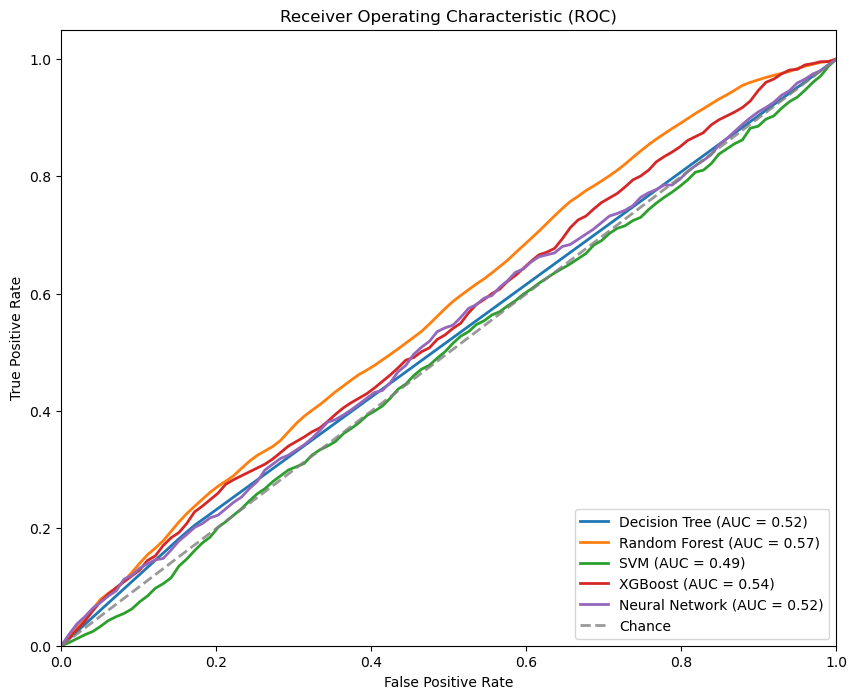

In [119]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score
import matplotlib.pyplot as plt

# Models to loop through
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Initialize lists for storing metrics
model_metrics = {}

plt.figure(figsize=(10, 8))  # Set figure size for ROC curve

# Initialize Stratified K-Fold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    roc_auc_scores = []
    f1_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    cm_sum = np.zeros((2, 2))  # Initialize cumulative confusion matrix

    for train_index, test_index in stratified_cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Train the model
        model.fit(X_train_fold, y_train_fold)
        
        # Predict on test fold
        y_test_pred = model.predict(X_test_fold)
        y_test_prob = model.predict_proba(X_test_fold)[:, 1]
        
        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
        recall = recall_score(y_test_fold, y_test_pred)
        precision = precision_score(y_test_fold, y_test_pred)
        roc_auc = roc_auc_score(y_test_fold, y_test_prob)
        f1 = f1_score(y_test_fold, y_test_pred)  # Calculate F1 score
        
        # Append scores
        recall_scores.append(recall)
        precision_scores.append(precision)
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test_fold, y_test_pred)
        cm_sum += cm  # Add to cumulative confusion matrix

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Calculate mean and standard deviation of each metric
    cv_results_table = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'ROC AUC', 'F1 Score'],
        'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(roc_auc_scores), np.mean(f1_scores)],
    })

    # Calculate mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot the ROC curve for current model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')

    # Store results for the model
    model_metrics[model_name] = {
        'metrics': cv_results_table,
        'confusion_matrix': cm_sum
    }

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [120]:
import pandas as pd
import numpy as np

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Loop through each model's metrics
for model_name, results in model_metrics.items():
    # Extract metrics for the current model
    model_metrics_df = results['metrics']
    
    # Transpose the DataFrame to have 'Metric' as index and 'Value' as column
    model_metrics_df = model_metrics_df.set_index('Metric').T
    
    # Add 'Model' column with model_name
    model_metrics_df['Model'] = model_name
    
    # Append to the main results DataFrame
    results_df = pd.concat([results_df, model_metrics_df])

# Reset index for the final results DataFrame
results_df = results_df.reset_index(drop=True)

# Set 'Metric' column as index
results_df.set_index('Model', inplace=True)

# Display the combined results
print("\nCombined Cross-validation K-Fold results:")
results_df



Combined Cross-validation K-Fold results:


Metric          Accuracy  Sensitivity   ROC AUC  F1 Score
Model                                                    
Decision Tree   0.729144     0.206029  0.516734  0.193618
Random Forest   0.839749     0.007711  0.568719  0.014986
SVM             0.841839     0.000000  0.493763  0.000000
XGBoost         0.822330     0.039676  0.542065  0.065425
Neural Network  0.819557     0.049463  0.524405  0.049164

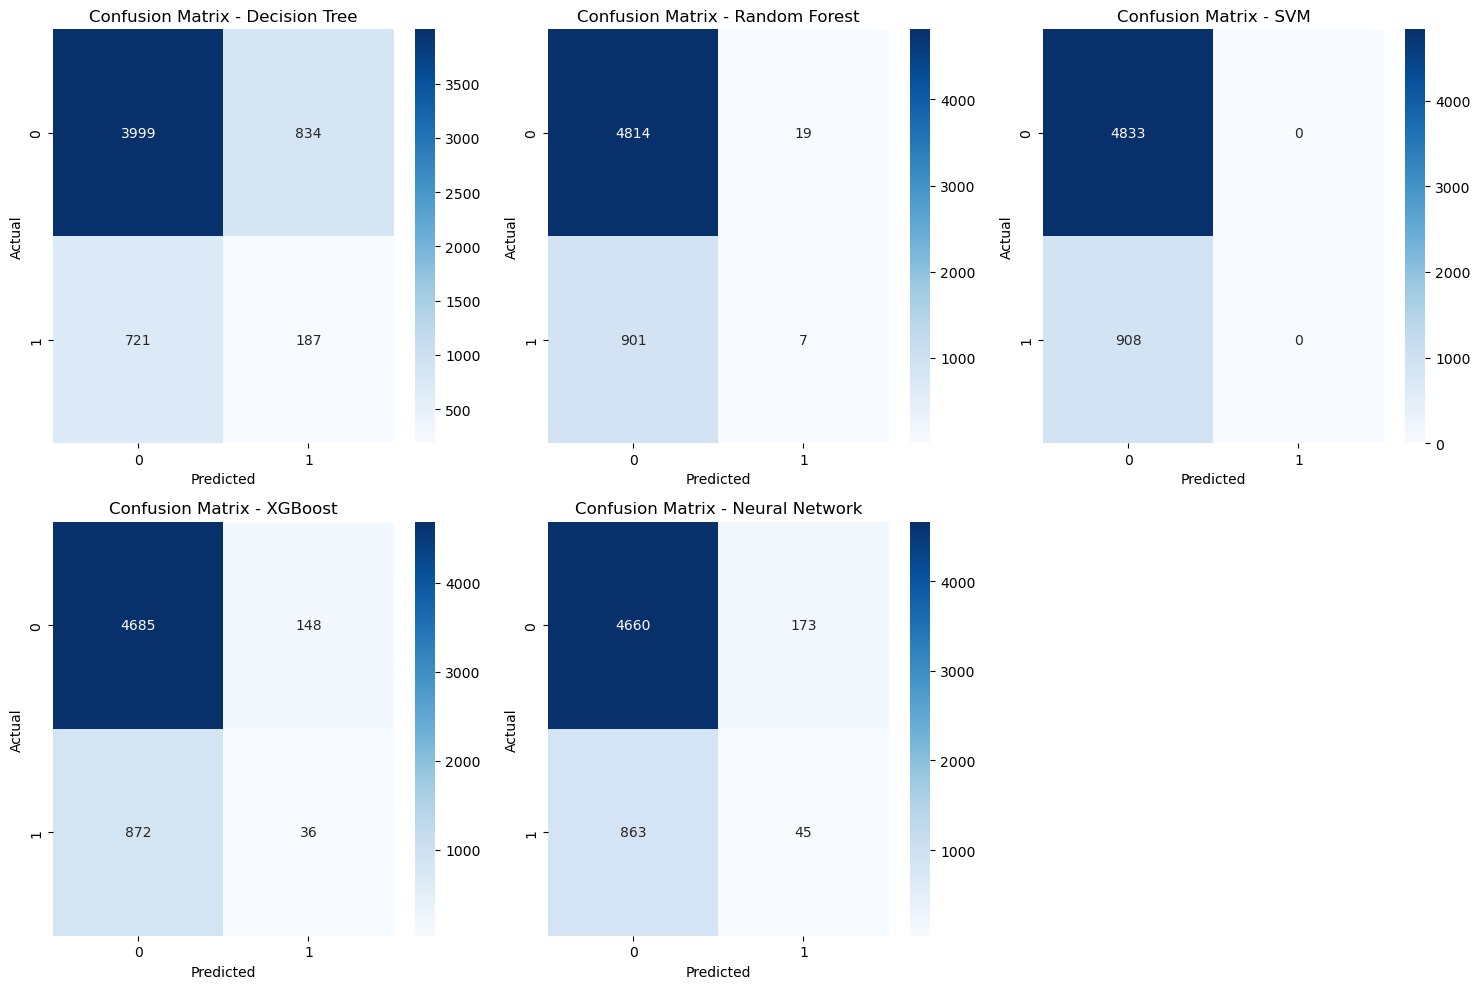

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap plot

# Plot confusion matrix for each model
plt.figure(figsize=(15, 10))
for i, (model_name, results) in enumerate(model_metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


## PERBANDINGAN MODEL SMOTE 

### SMOTE

Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating SVM...
Training and evaluating XGBoost...
Training and evaluating Neural Network...


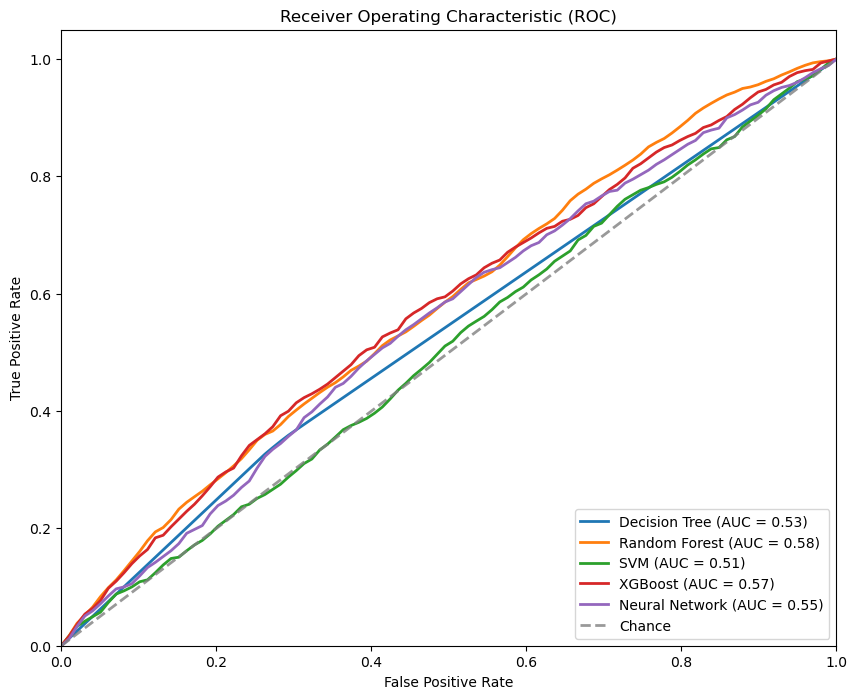

In [116]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Models to loop through
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Initialize lists for storing metrics
model_metrics = {}

plt.figure(figsize=(10, 8))  # Set figure size for ROC curve

# Initialize Stratified K-Fold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    roc_auc_scores = []
    specificity_scores = []
    f1_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    cm_sum = np.zeros((2, 2))  # Initialize cumulative confusion matrix

    for train_index, test_index in stratified_cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Apply SMOTE to the training data only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
        
        # Train the model
        model.fit(X_train_fold_resampled, y_train_fold_resampled)
        
        # Predict on test fold
        y_test_pred = model.predict(X_test_fold)
        y_test_prob = model.predict_proba(X_test_fold)[:, 1]
        
        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
        recall = recall_score(y_test_fold, y_test_pred)
        precision = precision_score(y_test_fold, y_test_pred)
        roc_auc = roc_auc_score(y_test_fold, y_test_prob)
        f1 = f1_score(y_test_fold, y_test_pred)  # Calculate F1 score
        
        # Append scores
        recall_scores.append(recall)
        precision_scores.append(precision)
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test_fold, y_test_pred)
        cm_sum += cm  # Add to cumulative confusion matrix

        tn, fp, fn, tp = cm.ravel()
        
        # Calculate specificity
        specificity = tn / (tn + fp)
        specificity_scores.append(specificity)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Calculate mean and standard deviation of each metric
    cv_results_table = pd.DataFrame({
        'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC', 'F1 Score'],
        'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(specificity_scores), np.mean(roc_auc_scores), np.mean(f1_scores)],
    })

    # Calculate mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot the ROC curve for current model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')

    # Store results for the model
    model_metrics[model_name] = {
        'metrics': cv_results_table,
        'confusion_matrix': cm_sum
    }

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [118]:
import pandas as pd
import numpy as np

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Loop through each model's metrics
for model_name, results in model_metrics.items():
    # Extract metrics for the current model
    model_metrics_df = results['metrics']
    
    # Transpose the DataFrame to have 'Metric' as index and 'Value' as column
    model_metrics_df = model_metrics_df.set_index('Metric').T
    
    # Add 'Model' column with model_name
    model_metrics_df['Model'] = model_name
    
    # Append to the main results DataFrame
    results_df = pd.concat([results_df, model_metrics_df])

# Reset index for the final results DataFrame
results_df = results_df.reset_index(drop=True)

# Set 'Metric' column as index
results_df.set_index('Model', inplace=True)

# Display the combined results
print("\nCombined Cross-validation K-Fold results:")
results_df



Combined Cross-validation K-Fold results:


Metric           Akurasi  Sensitivitas  Spesifisitas   ROC AUC  F1 Score
Model                                                                   
Decision Tree   0.663649      0.343652      0.723775  0.533714  0.243950
Random Forest   0.720780      0.283073      0.803018  0.577616  0.242697
SVM             0.554613      0.417285      0.580370  0.508606  0.227289
XGBoost         0.713815      0.289642      0.793506  0.572165  0.242386
Neural Network  0.413726      0.674737      0.364566  0.552991  0.241395

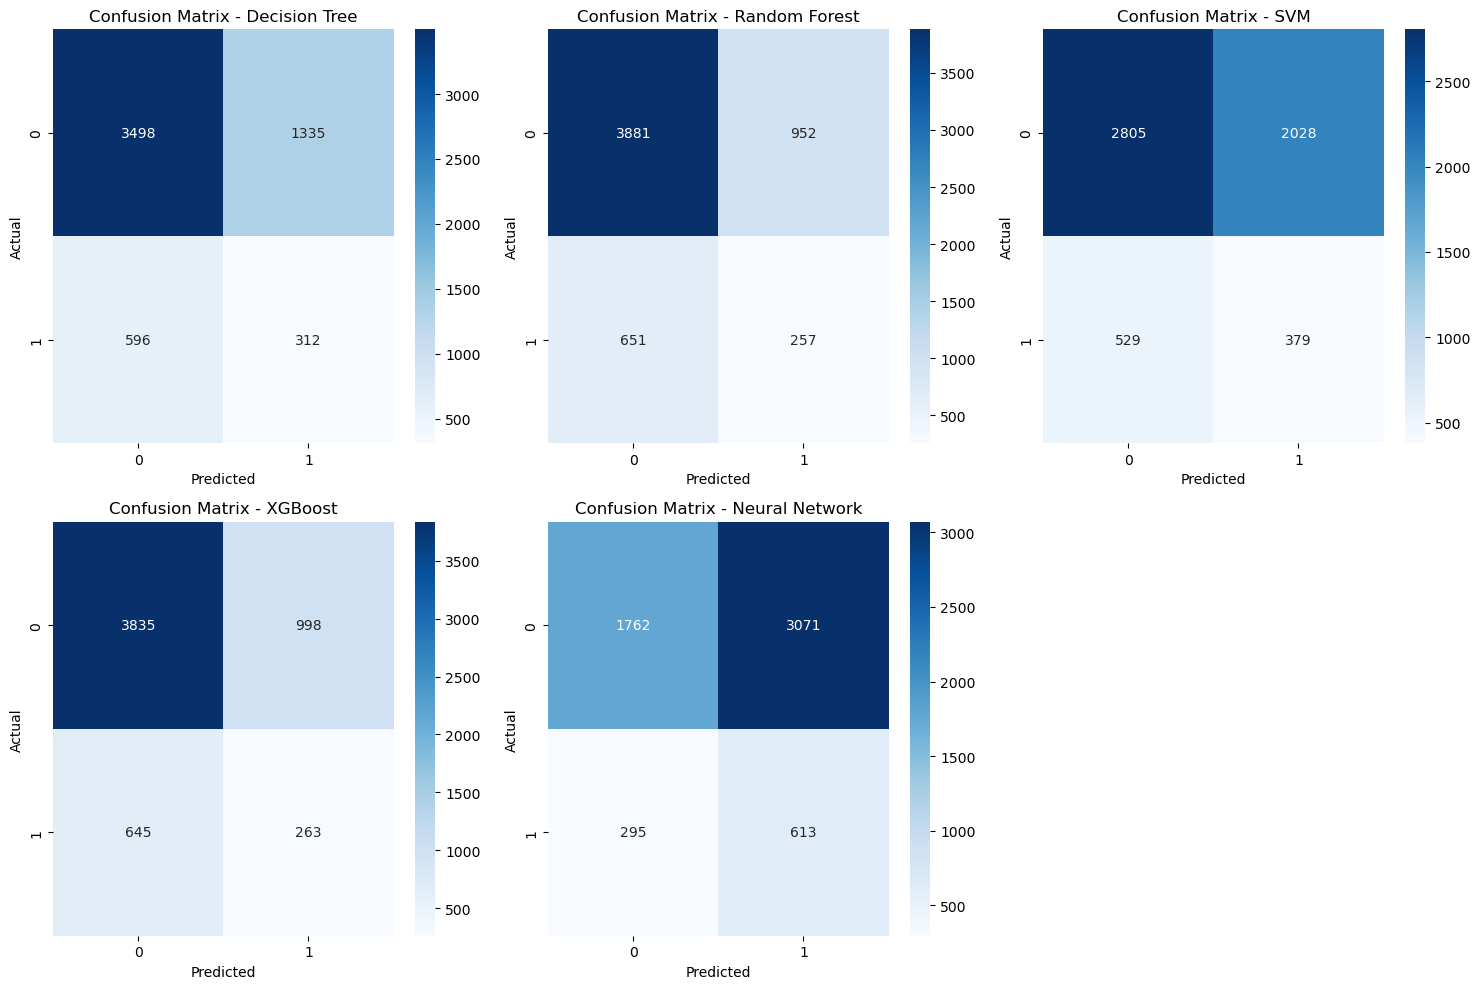

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap plot

# Plot confusion matrix for each model
plt.figure(figsize=(15, 10))
for i, (model_name, results) in enumerate(model_metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


# 5. Tunning Hyperparameter

## ROC AUC

## 1. Decision Tree

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Handle class imbalance 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='roc_auc' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)


print(f'Best Parameters: {best_params}')
print(f'ROC AUC on test set: {roc_auc:.4f}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 10}
ROC AUC on test set: 0.5645


## 2. Random Forest

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='roc_auc' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters: {best_params}')
print(f'ROC AUC on test set: {roc_auc:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
ROC AUC on test set: 0.5945


## 3. SVM

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert to DataFrame for pandas compatibility
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = SVC(probability = True, random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy'
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters for SVM: {best_params}')
print(f'ROC AUC on test set: {roc_auc:.4f}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for XGBoost: {'C': 10, 'kernel': 'poly', 'gamma': 'scale'}
Accuracy on test set: 0.5487


## 4. XGBoost

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='roc_auc' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters for XGBoost: {best_params}')
print(f'ROC AUC on test set: {roc_auc:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
ROC AUC on test set: 0.5821


## 5. NN Classification

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = MLPClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='roc_auc' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict probabilities on test set
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Best Parameters for Neural Network: {best_params}')
print(f'ROC AUC on test set: {roc_auc:.4f}')


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
ROC AUC on test set: 0.5461


## Accuracy

## 1. Decision Tree

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = DecisionTreeClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy on test set: {accuracy:.4f}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy on test set: 0.6924


## 2. Random Forest

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy on test set: {accuracy:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on test set: 0.7156


## 3. SVM

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = SVC(probability=True, random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy'
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters for SVM: {best_params}')
print(f'Accuracy on test set: {accuracy:.4f}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for XGBoost: {'C': 10, 'kernel': 'poly', 'gamma': 'scale'}
Accuracy on test set: 0.6394


## 4. XGBoost

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters for XGBoost: {best_params}')
print(f'Accuracy on test set: {accuracy:.4f}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Accuracy on test set: 0.7379


## 5. NN Classification

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the model
model = MLPClassifier(random_state=42)

# Define parameters for GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Initialize GridSearchCV with scoring='accuracy' and StratifiedKFold
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=stratified_cv, verbose=1, n_jobs=-1)

# Perform Grid Search to find best parameters
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Best Parameters for Neural Network: {best_params}')
print(f'Accuracy on test set: {accuracy:.4f}')


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters for Neural Network: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy on test set: 0.4547


# 6. Model Terbaik (Setelah Tunning + SMOTE)

Training and evaluating Decision Tree...
Training and evaluating Random Forest...
Training and evaluating SVM...
Training and evaluating XGBoost...
Training and evaluating Neural Network...


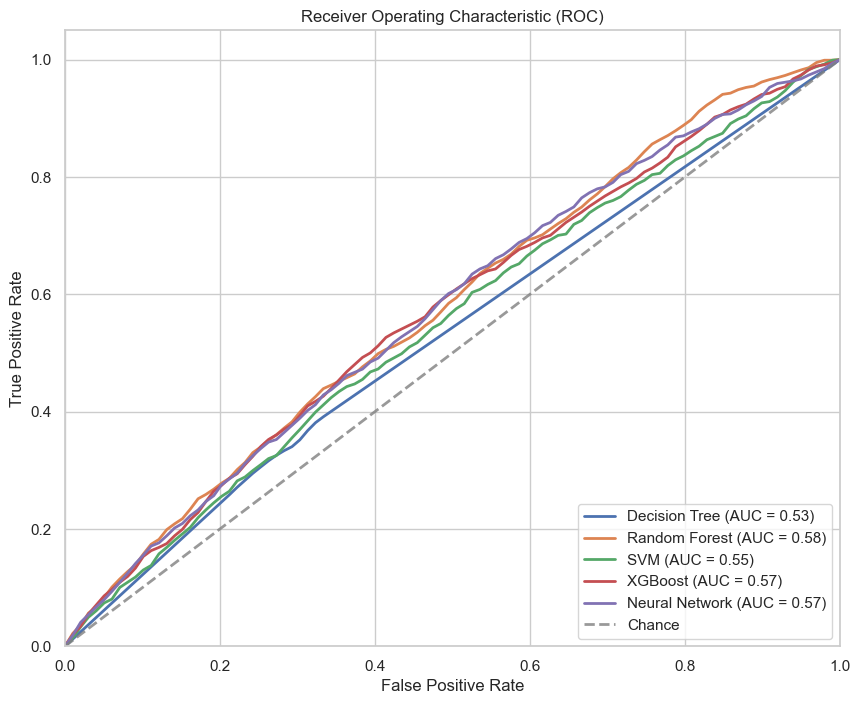

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Models to loop through
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth= None, min_samples_leaf = 1, min_samples_split = 5, random_state=42),
    'Random Forest': RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, 
                                            n_estimators= 300, random_state=42),
    'SVM': SVC(C=10, kernel = 'poly', gamma = 'scale', probability=True, random_state=42),
    'XGBoost': XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.3, max_depth= 7, 
                             n_estimators= 300, subsample= 1.0, eval_metric='logloss', use_label_encoder=False, random_state=42),
    'Neural Network': MLPClassifier(activation= 'relu', alpha= 0.01, hidden_layer_sizes= (50,), 
                                    learning_rate='constant', solver= 'adam', random_state=42)
}

# Initialize lists for storing metrics
model_metrics = {}

plt.figure(figsize=(10, 8))  # Set figure size for ROC curve

# Initialize Stratified K-Fold
stratified_cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    roc_auc_scores = []
    specificity_scores = []
    f1_scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    cm_sum = np.zeros((2, 2))  # Initialize cumulative confusion matrix

    for train_index, test_index in stratified_cv.split(X_train, y_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Apply SMOTE to the training data only
        smote = SMOTE(random_state=42)
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
        
        # Train the model
        model.fit(X_train_fold_resampled, y_train_fold_resampled)
        
        # Predict on test fold
        y_test_pred = model.predict(X_test_fold)
        y_test_prob = model.predict_proba(X_test_fold)[:, 1]
        
        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_test_fold, y_test_pred))
        recall = recall_score(y_test_fold, y_test_pred)
        precision = precision_score(y_test_fold, y_test_pred)
        roc_auc = roc_auc_score(y_test_fold, y_test_prob)
        f1 = f1_score(y_test_fold, y_test_pred)  # Calculate F1 score
        
        # Append scores
        recall_scores.append(recall)
        precision_scores.append(precision)
        roc_auc_scores.append(roc_auc)
        f1_scores.append(f1)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_test_fold, y_test_pred)
        cm_sum += cm  # Add to cumulative confusion matrix

        tn, fp, fn, tp = cm.ravel()
        
        # Calculate specificity
        specificity = tn / (tn + fp)
        specificity_scores.append(specificity)

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test_fold, y_test_prob)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0

    # Calculate mean and standard deviation of each metric
    cv_results_table = pd.DataFrame({
        'Metric': ['Akurasi', 'Sensitivitas', 'Spesifisitas', 'ROC AUC', 'F1 Score'],
        'Value': [np.mean(accuracy_scores), np.mean(recall_scores), np.mean(specificity_scores), np.mean(roc_auc_scores), np.mean(f1_scores)],
    })

    # Calculate mean ROC curve
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    # Plot the ROC curve for current model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model_name} (AUC = {mean_auc:.2f})')

    # Store results for the model
    model_metrics[model_name] = {
        'metrics': cv_results_table,
        'confusion_matrix': cm_sum
    }

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [60]:
import pandas as pd
import numpy as np

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Loop through each model's metrics
for model_name, results in model_metrics.items():
    # Extract metrics for the current model
    model_metrics_df = results['metrics']
    
    # Transpose the DataFrame to have 'Metric' as index and 'Value' as column
    model_metrics_df = model_metrics_df.set_index('Metric').T
    
    # Add 'Model' column with model_name
    model_metrics_df['Model'] = model_name
    
    # Append to the main results DataFrame
    results_df = pd.concat([results_df, model_metrics_df])

# Reset index for the final results DataFrame
results_df = results_df.reset_index(drop=True)

# Set 'Metric' column as index
results_df.set_index('Model', inplace=True)

# Display the combined results
print("\nCombined Cross-validation K-Fold results:")
results_df



Combined Cross-validation K-Fold results:


Metric           Akurasi  Sensitivitas  Spesifisitas   ROC AUC  F1 Score
Model                                                                   
Decision Tree   0.668526      0.320503      0.733909  0.530438  0.234102
Random Forest   0.720083      0.275369      0.803640  0.575793  0.237286
SVM             0.639418      0.355947      0.692754  0.548704  0.225471
XGBoost         0.725831      0.248928      0.815437  0.567606  0.223138
Neural Network  0.467508      0.634794      0.436245  0.571039  0.241563

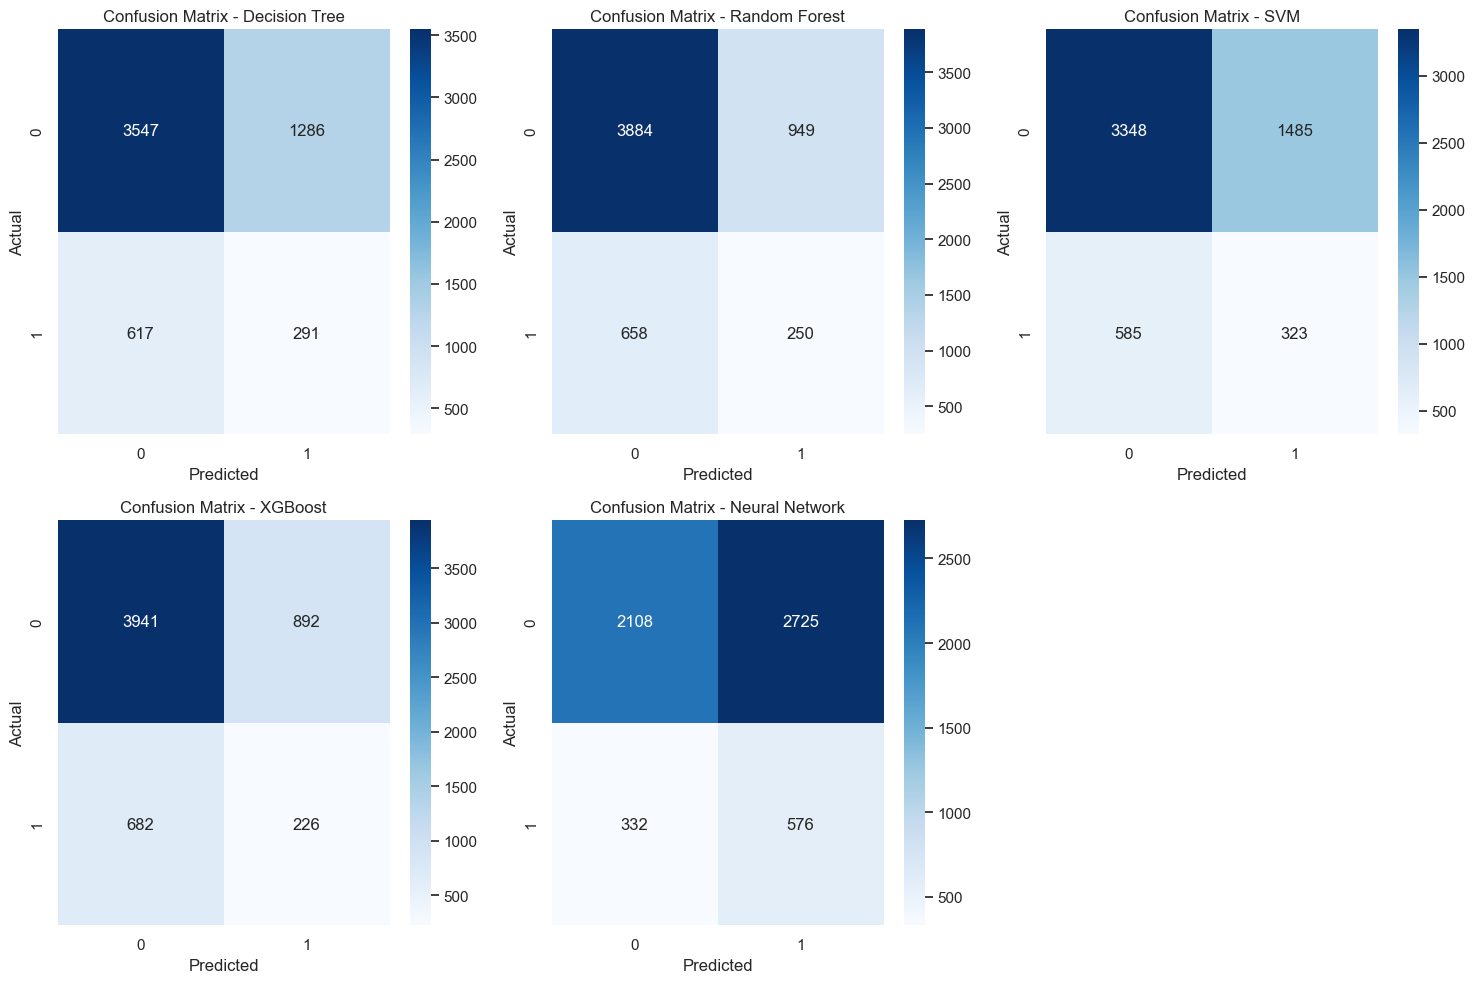

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns  # for heatmap plot

# Plot confusion matrix for each model
plt.figure(figsize=(15, 10))
for i, (model_name, results) in enumerate(model_metrics.items()):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(results['confusion_matrix'], annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
